## Table of Contents

### 1. Introduction
### 2. Problem Statement
 * Business/Research questions
### 3. Project Objectives
### 4. Data Preperation
   * State of the data
   * Data Cleaning
   * Preperation of data for analysis
### 5. Visualisations
### 6. Dashboard
### 7. Recommendations
### 8. Citations

# Introduction

Bike rental systems have recently emerged as one of the most revoulutionary methods of transportation attempting to curb the high amounts of carbon emissions from cars. Aside from being extremely popular and effective at lowering carbon emissions, bike rental systems hold a large amount of data for city planners to use. In this report, my team and I will explore the data collected from our branch in Washington DC for the past 2 years. Through data preparation, exploration, and visualisation, my team hope to seek out the intricate relationship between the number of rentals and the wide variety of data we have obtained, such as environmental and seasonal factors

## Problem Statement

We aim to identify trends and relationships within the data, with the ultimate goal of extracting meaningful recommendations and insights for our management team. These insights will be instrumental in guiding future business improvements and strategies, ensuring that Leo Bike Share Co remains at the forefront of the bike-sharing industry in Washington DC.

Based on the collected data, I have develop an eda list of primary business/research questions I am trying to answer with my visualisations in the report.

#### Business/Research questions

1) How does demand vary by season?
2) Which days of the week have the most demand?
3) How does the weather affect bike rentals?
4) How does the temperature affect bike rentals?
5) Which months had the most demand?
6) How does the wind affect rentals?
7) How does the ratio of casual and registered users change over the years?
8) Which weather conditions result in the most customers?
9) Do people rent more bikes on working on non-working days?
10) How did the number of bike rentals change over the years?
11) How does humidity affect bike rentals?
12) Which season had the most demand?
13) Does the business have more casual or registered users?

I created these questions with the goal of using the data to provide recommendations to management for future business improvements.

## Project Objectives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties as fp
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize
from scipy.stats import norm
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from scipy.interpolate import griddata
from matplotlib.legend_handler import HandlerTuple
from matplotlib.animation import FuncAnimation as animation

%matplotlib inline

df = pd.read_csv(r"BikeSharing Dataset.csv")

# Create a copy of the DataFrame, df_bkup
df_bkup = df.copy()

# Check data type of each column
print(df.info())

# Show first 20 rows of df
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,06/01/2011,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,07/01/2011,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,08/01/2011,1,0,1,0,6,0,2,6.77,8.11,53.58,17.88,68,891,959
8,9,09/01/2011,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,10/01/2011,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


## Data Preparation

I will now do some data testing find missing values, invalid data, change data types for better analysis and find any outliers

In [2]:
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df["yr"].unique()

array([0, 1], dtype=int64)

In [5]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df["holiday"].unique()

array([0, 1], dtype=int64)

In [8]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
df["workingday"].unique()

array([0, 1], dtype=int64)

In [10]:
df["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [11]:
df["hum"].min()

0.0

In [12]:
df["hum"].max()

97.25

In [13]:
df["casual"].min()

2

In [14]:
df["registered"].min()

20

In [15]:
df["cnt"].min()

22

In [16]:
df["temp"].min()

2.42

In [17]:
df["temp"].max()

35.33

In [18]:
pd.set_option('display.max_rows', None)
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,06/01/2011,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,07/01/2011,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,08/01/2011,1,0,1,0,6,0,2,6.77,8.11,53.58,17.88,68,891,959
8,9,09/01/2011,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,10/01/2011,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


After doing a quick check of the data, I found that the data was relatively clean with no null values and no accidental data inputs for those with only a list of values allowed such as "weekdays".

I plan to change "dteday" into a datetime datatype for easier data manipulation.

Lastly, I checked the minimum and maximum values of each data as well as scrolling through the whole dataset to find these outliers:

- There is a row with '0' humidity, which is physically impossible, so I will delete it.
- I will also delete the "instant" column as I will not need the data.

### Data Cleaning

In [19]:
df = df.drop("instant", axis = 1)

In [20]:
df = df[df["hum"] != 0]
df["hum"].min()

18.79

In [21]:
df["dteday"] = pd.to_datetime(df["dteday"], format = "%d/%m/%Y")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


In [23]:
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


## Visualisations

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')

In [25]:
dteday = df["dteday"]
cnt = df["cnt"]

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\100426589.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xtick_labels = pd.date_range(start = pd.to_datetime("2010-12-20"), end = pd.to_datetime("2013-01-10"), freq = '3M')


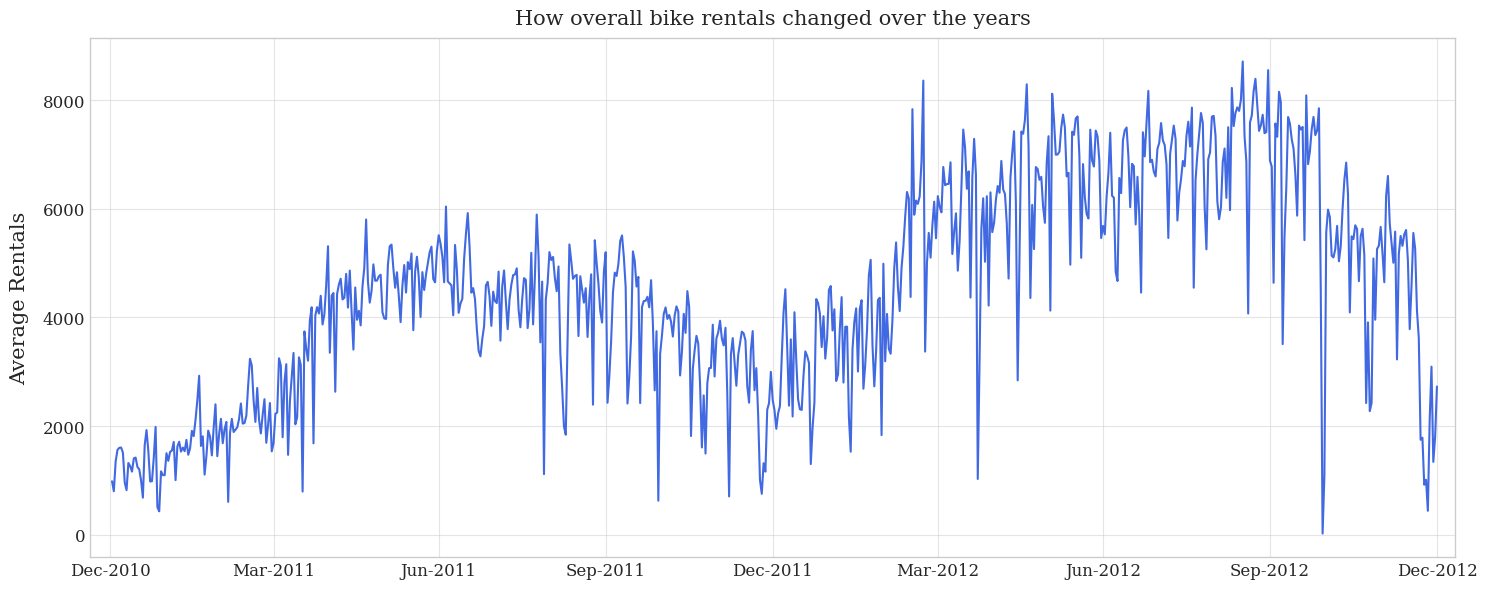

In [26]:
fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(dteday, cnt, color = "royalblue", label = "Bike rentals", linewidth = 1.5)
ax.set_title("How overall bike rentals changed over the years", fontproperties = "serif", fontsize = 15, pad = 10)
ax.set_ylabel("Average Rentals", labelpad = 10, fontsize = 15, fontproperties = "serif")

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 1, interval = 3))
xtick_labels = pd.date_range(start = pd.to_datetime("2010-12-20"), end = pd.to_datetime("2013-01-10"), freq = '3M')
ax.set_xticks(xtick_labels)
ax.set_xticklabels([label.strftime('%b-%Y') for label in xtick_labels])


for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')

for label in ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')
    

ax.set_xlim(pd.to_datetime("2010-12-20"), pd.to_datetime("2013-01-10"))
ax.grid(alpha = 0.5)

fig.tight_layout()
plt.show()

#### I noticed there were many sharp drops in values, which might represent extreme outliers. As such, I decided to find out the dates of such events and what external factors may have caused these to occur.

In [27]:
df['change'] = df['cnt'].diff()
largest_drops = df.nsmallest(5, 'change')
largest_drops[['dteday', 'cnt', 'change']]

,dteday,cnt,change
477,2012-04-22,1027,-5597.0
448,2012-03-24,3372,-4990.0
645,2012-10-07,3510,-4455.0
667,2012-10-29,22,-4437.0
238,2011-08-27,1115,-3546.0


After conducting thorough research online, I found notable events associated with three specific days: Hurricane Sandy, Hurricane Irene, and the Reason Rally. Interestingly, the days with the largest and third-largest drops in rental activity didn't correspond to any significant events that I could identify through Google searches. This absence of noteworthy events for those particular days suggests that there might not be any further anomalies in our data. I decide to keep in these data as although anomalies, the occurance of these events should be acknowledged as part of the variables in our business.

In [28]:
hurricane_sandy_date = pd.to_datetime("2012-10-29")
hurricane_irene_date = pd.to_datetime("2011-08-27")
reason_rally_date = pd.to_datetime("2012-03-24")

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\2820036714.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tick_labels = pd.date_range(start = pd.to_datetime("2010-12-20"), end = pd.to_datetime("2013-01-10"), freq = '3M')


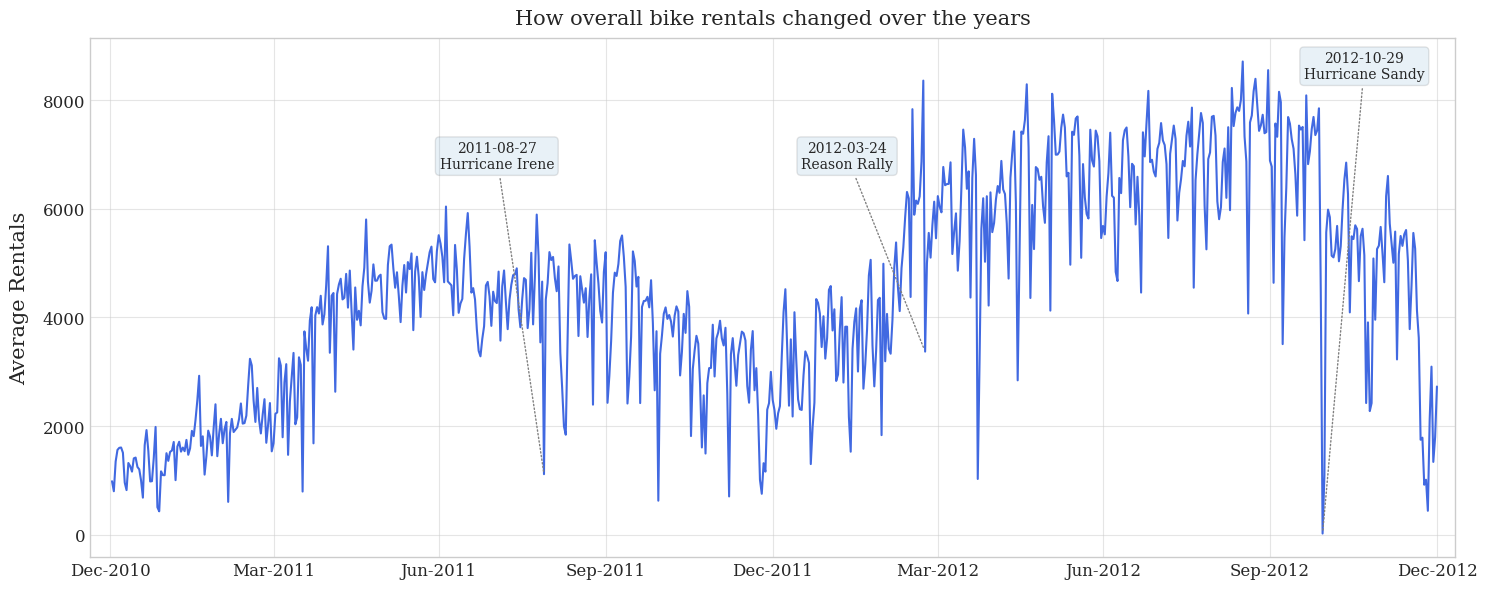

In [29]:
fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(dteday, cnt, color = "royalblue", label = "Bike rentals", linewidth = 1.5)
ax.set_title("How overall bike rentals changed over the years", fontproperties = "serif", fontsize = 15, pad = 10)
ax.set_ylabel("Average Rentals", labelpad = 10, fontsize = 15, fontproperties = "serif")

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 1, interval = 3))
tick_labels = pd.date_range(start = pd.to_datetime("2010-12-20"), end = pd.to_datetime("2013-01-10"), freq = '3M')
ax.set_xticks(tick_labels)
ax.set_xticklabels([label.strftime('%b-%Y') for label in tick_labels])


for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')

for label in ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')
    
# Annotation    
y_value_sandy = df[df['dteday'] == hurricane_sandy_date]['cnt'].values
ax.annotate(f'{"2012-10-29"}\nHurricane Sandy', xy = (hurricane_sandy_date, y_value_sandy), xytext = (pd.to_datetime("2012-11-21"), 0.99 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color = 'grey'),
           fontproperties = "serif", fontsize = 10)


y_value_irene = df[df['dteday'] == hurricane_irene_date]['cnt'].values
ax.annotate(f'{"2011-08-27"}\nHurricane Irene', xy = (hurricane_irene_date, y_value_irene), xytext = (pd.to_datetime("2011-08-01"), 0.8 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color = 'grey'),
           fontproperties = "serif", fontsize = 10)


y_value_rally = df[df['dteday'] == reason_rally_date]['cnt'].values
ax.annotate(f'{"2012-03-24"}\nReason Rally', xy = (reason_rally_date, y_value_rally), xytext = (pd.to_datetime("2012-02-10"), 0.8 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color='grey'),
           fontproperties = "serif", fontsize = 10)
    
    

ax.set_xlim(pd.to_datetime("2010-12-20"), pd.to_datetime("2013-01-10"))
ax.grid(alpha = 0.5)

fig.tight_layout()
plt.show()

This line graph presents the daily total bike rentals for our company over a two-year period. The data shows a generally increasing trend in bike rentals, with seasonal patterns evidenced by regular peaks and troughs. However, there are three significant deviations from the expected seasonal trends due to specific events. In August 2011 and October 2012, hurricanes led to a large decrease in bike rentals, reflecting the impact of severe weather conditions on our business. Additionally, the Reason Rally in March 2012 contributed to a noticeable dip in rentals. These events demonstrate the sensitivity of bike rental demand to external factors beyond seasonal variability. The overall trend, however, remains positive for the two year period, indicating a growing interest in our bike rentals over time.

This visual answers the question: 'How did the number of bike rentals change over the years?'

In [30]:
cnt = df["cnt"]
temp = df["temp"]
hum = df["hum"]

In [31]:
points = np.column_stack((temp, hum))
values = cnt

# Grid for temperature and humidity
temp_lin = np.linspace(temp.min(), temp.max(), 100)
hum_lin = np.linspace(hum.min(), hum.max(), 100)
temp_grid, hum_grid = np.meshgrid(temp_lin, hum_lin)

# Linear interpolation
cnt_grid_linear = griddata(points, values, (temp_grid, hum_grid), method = 'linear')
cnt_grid_linear = np.nan_to_num(cnt_grid_linear, nan = np.nanmin(values))

fig = go.Figure(data = [go.Surface(
    z = cnt_grid_linear,
    x = temp_grid,
    y = hum_grid,
    colorbar = dict(
        title = 'Average Rentals',
        titleside = 'right',
        ypad = 20,
        titlefont = dict(family = 'Serif', size = 16),
        tickfont = dict(family = 'Serif', size = 12)
    ),
    hovertemplate = (
        'Temperature (°C): %{x:.2f}<br>'
        'Humidity (%): %{y:.2f}<br>'
        'Total Rentals: %{z:.0f}<extra></extra>'
    )
)])

fig.update_layout(
    title = '3D Surface Plot of Temperature, Humidity, and Average Rentals',
    scene = dict(
        xaxis = dict(
            title = 'Temperature (°C)',
            title_font = dict(family = 'Serif', size = 12),
            tickfont = dict(family = 'Serif', size = 12)
        ),
        yaxis = dict(
            title = 'Humidity (%)',
            title_font = dict(family = 'Serif', size = 12),
            tickfont = dict(family = 'Serif', size = 12)
        ),
        zaxis = dict(
            title = 'Average Rentals',
            title_font = dict(family = 'Serif', size = 12),
            tickfont = dict(family = 'Serif', size = 12)
        )
    ),
    title_font = dict(family = 'Serif', size = 20),
    autosize = False,
    width = 800,
    height = 750
)

fig.show()

This 3D surface plot illustrates the relationship between temperature on the x-axis, humidity on the y-axis, and average rentals on the z-axis. Initially, there's a noticeable positive correlation between temperature and rental numbers, indicating an increase in rentals as temperature rises. However, beyond approximately 25°C, this relationship reverses, leading to a decline in average rentals.

Regarding humidity, the plot reveals that the optimal conditions for rentals occur at around 60% humidity. The relationship between humidity and rentals forms a dome shape, with rental numbers higher in the mid-range and lower at the extremities.

This visual answers the questions:'How does the temperature affect bike rentals?' and 'How does humidity affect bike rentals?'

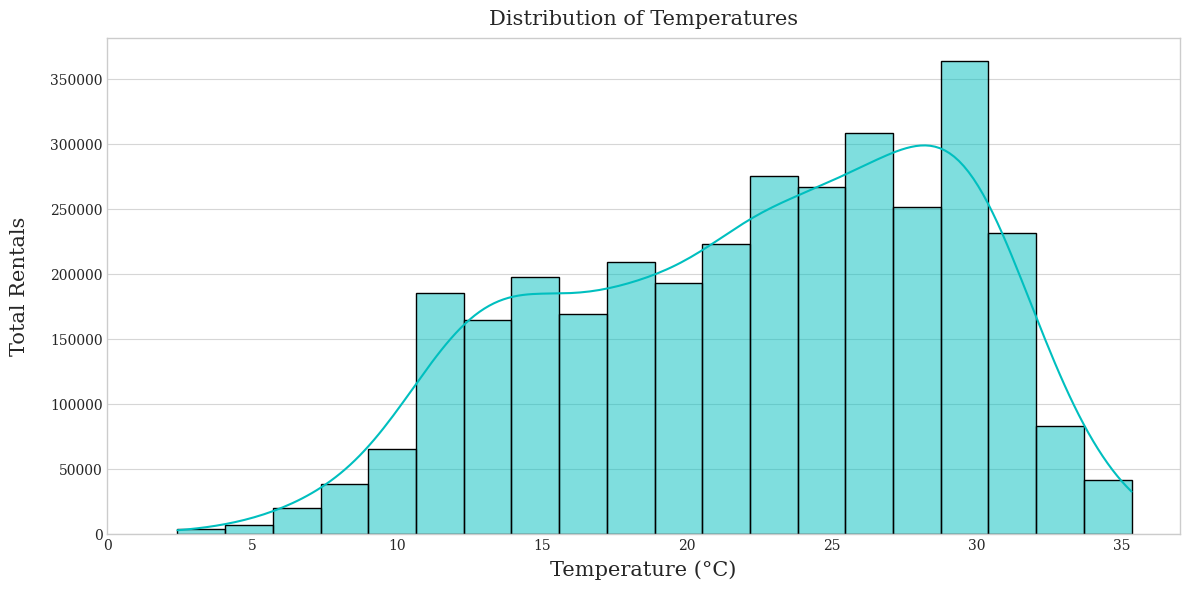

In [32]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(data = df, x = 'temp', weights = 'cnt', kde = True, color = "c", bins = 20)
plt.title('Distribution of Temperatures', fontproperties = "serif", fontsize = 15, pad = 10)
plt.xlabel('Temperature (°C)', fontproperties = "serif", fontsize = 15, labelpad = 5)
plt.ylabel('Total Rentals', fontproperties = "serif", fontsize = 15, labelpad = 15)
plt.xlim(0, 37)

for label in ax.get_xticklabels():
    label.set_fontsize(10)
    label.set_fontname('serif')

for label in ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontname('serif')
    
ax.grid(alpha = 0.8)
ax.xaxis.grid(False)

plt.tight_layout()

plt.show()

This histogram depicts the correlation between temperature and total bike rentals. It's evident that bike rentals are minimal at the temperature extremes, both in cooler and warmer conditions. There's a notable peak in bike rentals within the temperature range of 20 to 30°C.

The data suggests that most rentals occur during moderate temperatures, which are comfortable for people to engage in outdoor activities like biking. This insight implies that our company should prioritize areas where temperatures fall within this range, as it's where people are more inclined to rent bikes. By focusing on these temperature ranges, we can potentially increase rentals and consequently boost profits.

This chart answers the question:'How does temperature affect bike rentals?'

In [33]:
%matplotlib inline
temp = df["temp"]
cnt = df["cnt"]
season = df["season"]
seasons = df.groupby("season")["cnt"].count()
color_map = {1: 'limegreen', 2: 'red', 3: 'darkorange', 4: 'lightskyblue'}
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

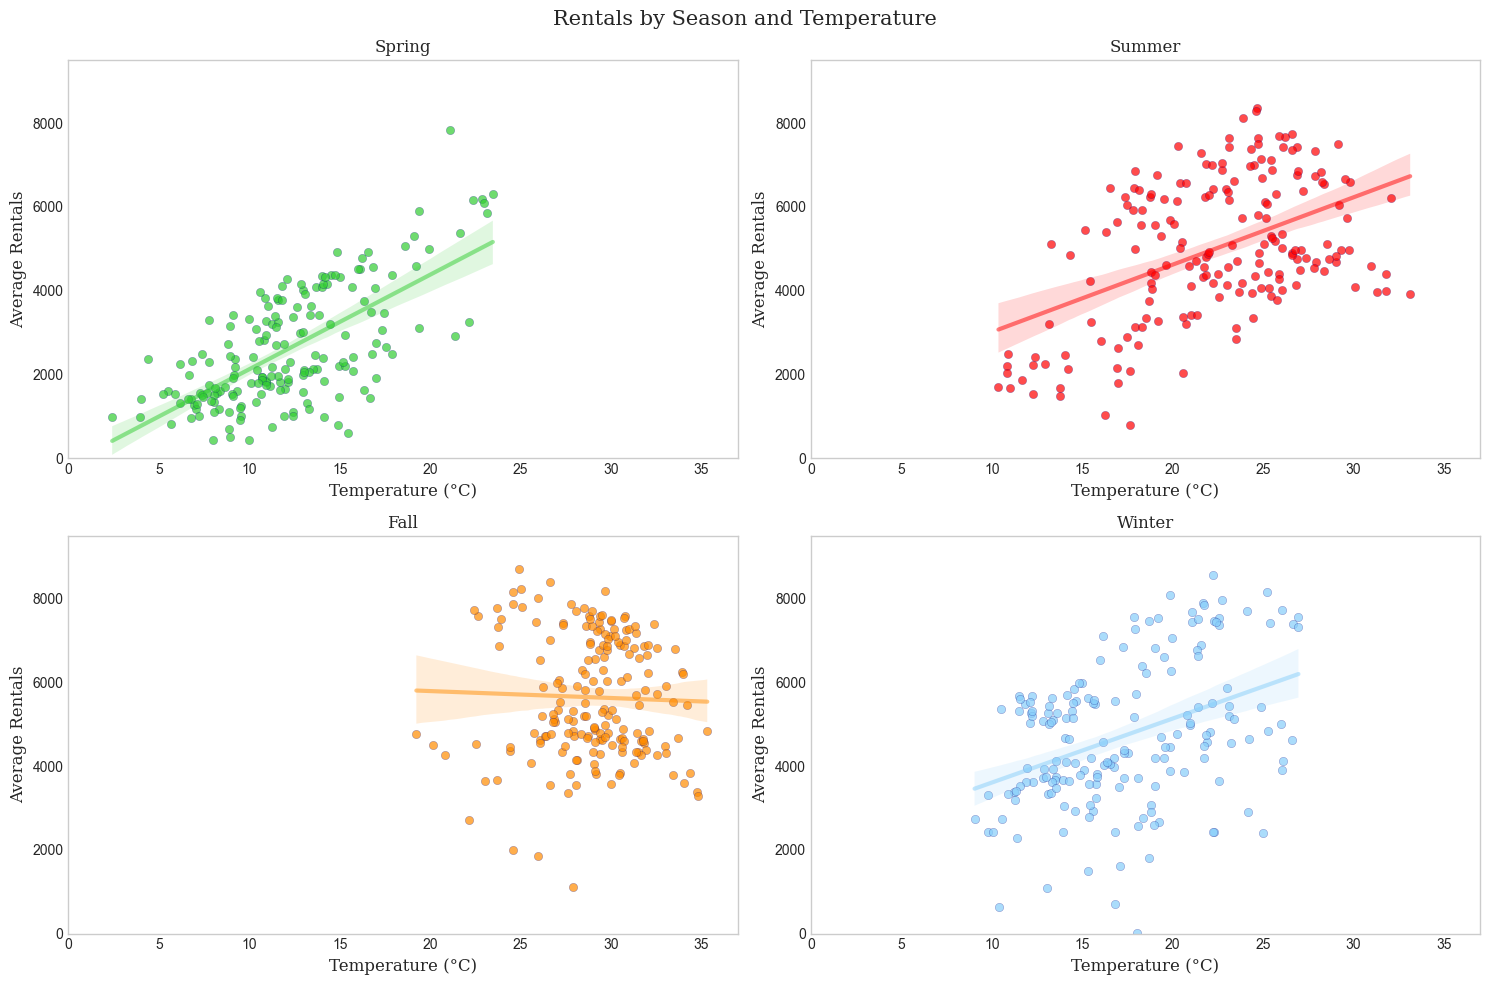

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axes = axes.flatten()

for i, season in enumerate(color_map.keys()):
    season_df = df[df['season'] == season]
    sns.scatterplot(x = season_df['temp'], y = season_df['cnt'], color = color_map[season],
                    alpha = 0.7, edgecolor = '#000080', linewidth = 0.2, ax = axes[i])
    sns.regplot(x = season_df['temp'], y = season_df['cnt'], scatter = False, color = color_map[season],
                ax = axes[i], line_kws = {'alpha': 0.5, 'lw': 3})
    
    axes[i].set_title(f"{season_labels[season]}", fontproperties = "serif", fontsize = 12)
    axes[i].set_xlim(0, 37)
    axes[i].set_ylim(0, 9500)
    axes[i].set_xlabel("Temperature (°C)", fontproperties = "serif", fontsize = 12)
    axes[i].set_ylabel("Average Rentals", fontproperties = "serif", fontsize = 12)
    axes[i].grid(c = "w")

fig.suptitle("Rentals by Season and Temperature", fontproperties = "serif", fontsize = 15)
plt.tight_layout()
plt.show()

There are 4 seperate filters for the figure. Each season has a scatter plot with a regression line. The seasons are color coded to provide another layer of differentiation to go with the title for easier comparisions among seasons. The same scale, x and y axes are used to allow similiar comparison. The visuals will show how the number of rentals change alongside temperature.


For spring, there is a huge positive correlation between temperature and the number of rentals. Spring is the season with the lowest number of rentals, in part due to it being the coldest season.

For summer, there is also a positive correlation between temperature and the number of rentals. However, the correlation is not as big as it is with spring. The increase in values comes with a drop in rentals from 30°C, which supports the findings from the histogram.

For winter, there is a positive correlation between temperature and the number of rentals, similarly with summer. The values for winter have more variance and are more spread out compared to the other months.

For fall, there is actually a negative correlation between temperature and the number of rentals. Even starting at 20°C instead of 30°C, it still has a negative correlation. Despite it, due to its high temperatures, Fall has the most rentals out of any months despite the downwards trend.

This visual answers the questions:'Which season had the most demand?'

In [35]:
x_labels = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]

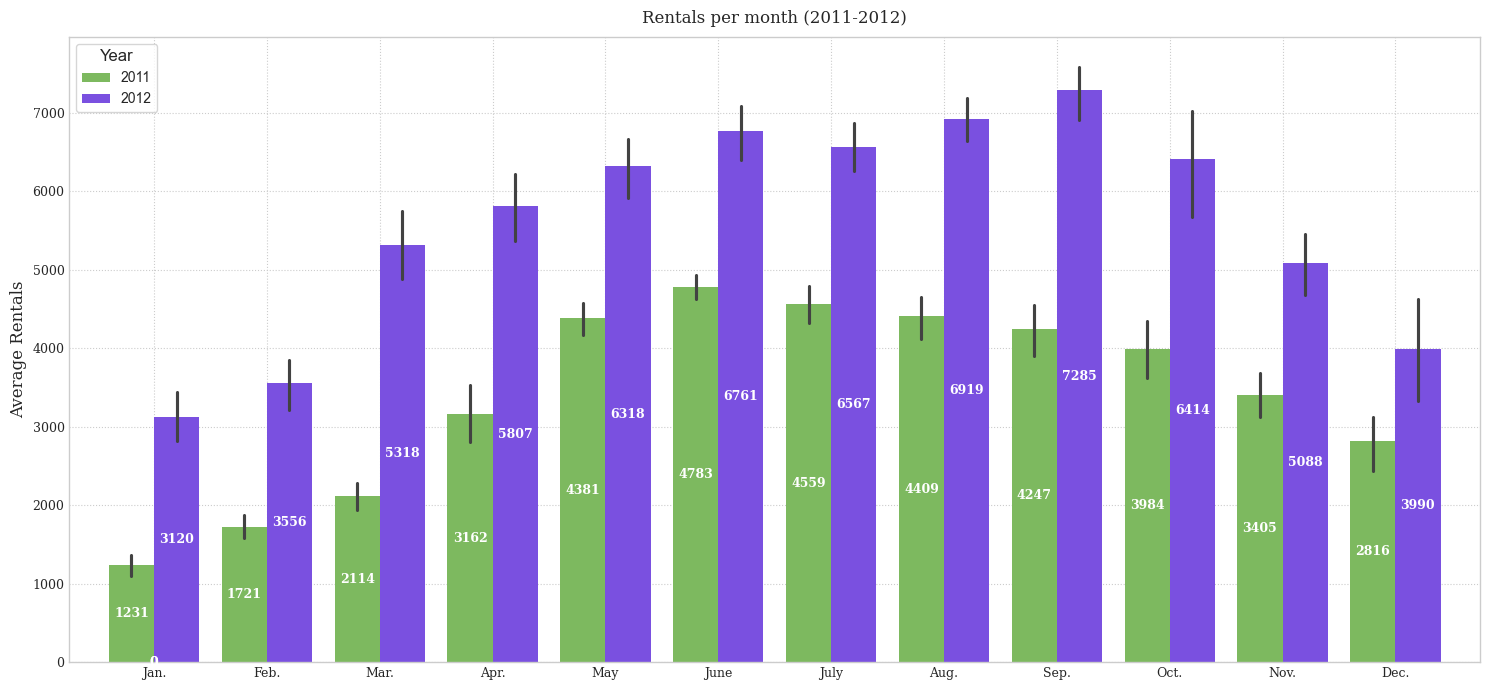

In [36]:
plt.figure(figsize = (15, 7))

palette = {0: '#78C850', 1: '#7038F8'}
ax = sns.barplot(x = 'mnth', y = 'cnt', data = df, hue = 'yr', palette = palette)

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, fontproperties = 'serif', fontsize = 9, fontweight = 200)

for label in ax.get_yticklabels():
    label.set_fontsize(9)
    label.set_fontname('serif')

plt.title('Rentals per month (2011-2012)', fontproperties = 'serif', fontsize = 12, pad = 10)
ax.set_ylabel('Average Rentals', fontproperties = 'serif', fontsize = 12)
ax.set_xlabel('')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, ['2011', '2012'], loc = 'upper left', title = 'Year', fontsize = 10, frameon = True)
legend.get_title().set_fontsize('12')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha = 'center', va = 'center', 
                fontsize = 9, fontproperties = 'serif',
                color = 'w', fontweight = 800)


plt.tight_layout()
ax.set_xlim(-0.75, 11.75)
plt.grid(linestyle = ':')

plt.show()


This visual graphs the rentals per month for both years, with the green bar representing the rentals for 2011 and the purple bar representing the rentals for 2012. There is also an error bar which shows the standard deviation of each month, which gives more context to if the demand was evenly distributed or influenced by specific events or periods of exceptionally high or low usage. From the visual, we can see that the rentals per month is much higher in 2012 than in 2011, for both the peak and bottom months. This could represent a more consistent base of customers due to an increase of registered customers. The peak month in 2011 is also different from 2012. The peak month was June in 2011 but in 2012, September and August both registered more customers. Ths could be due to various factors, such as wearther, marketing efforts or infrastruture. Investigating deeper into the external factors could bring light to other variables to optimize our customer base.

This graph answers the question: 'Which months had the demand?' and 'How did the number of bike rentals change over the years?'

In [37]:
df_corr = df[['season', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]

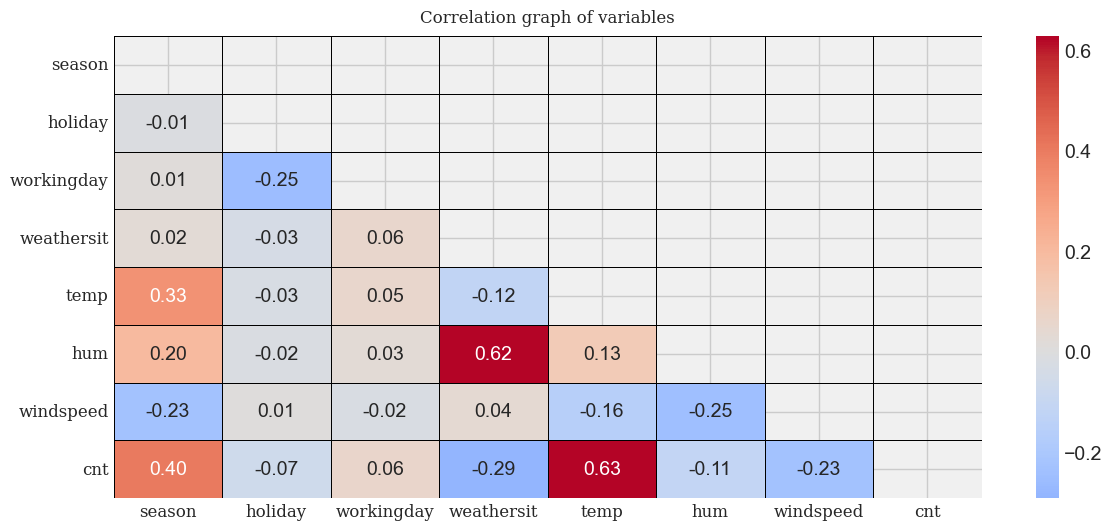

In [38]:
plt.figure(figsize = (14, 6))
corr = df_corr.corr()
plt.style.use('fivethirtyeight')
mask = np.triu(np.ones_like(df_corr.corr(), dtype = bool))

sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'k', fmt = '.2f', mask = mask)
plt.title("Correlation graph of variables", fontproperties = "serif", fontsize = 12, pad = 10)
plt.yticks(fontsize = 12, fontname = 'serif')
plt.xticks(fontsize = 12, fontname = 'serif')
plt.show()

This correlation graph is a heatmap designed to illustrate the strength of relationships between different variables. The intensity of the red color signifies a stronger positive correlation, indicating that as one variable increases, so does the other. Conversely, a deeper blue color represents a stronger negative correlation, suggesting that as one variable increases, the other decrease

For our purposes, I will only be focusing on the bottom of the graph, which focuses on how different variables affect number of rentals. Looking at the graph and color gradients, we noticed several insights:

- The seasons of fall and winter appear to attract more customers compared to spring and summer.

- Fall and Winter also seem to result in more customers instead of spring and summer.

- Calmer weather also leads to an incerase in rentals, with a negative correlation of -0.29. Windspeed closely follows behind with a correlation score of -0.23, showing that lower windspeeds could lead to higher demand.

Humidity is tricky to intepret as although the negative correlation of -0.11 tells a story of lower humidity incraesing sales, it might just be correlation instead of casusation. Humidity has a very strong correlation with the type of weather at 0.62. This means humidity might just be an indirect variable, especially with a positive correlation with temperature. We should seek an optimal level of humidity, one that fosters pleasant weather conditions without leading to adverse weather effects.

This graph loosely answers these questions:
* How does demand vary by season?
* How does the weather affect bike rentals?
* How does the temperature affect bike rentals?
* How does the wind affect rentals?
* Which weather conditions result in the most customers?
* Do people rent more bikes on working on non-working days?
* How does humidity affect bike rentals?

It is vital to remember that correlation does not equate to causation. This graph should be used as a starting point for visualizing relationships between variables. For comprehensive analysis, it should be combined with other data sources to provide ample context.

In [39]:
plt.style.use('seaborn-v0_8-whitegrid')
yr2011 = df[df["yr"] == 0]
weather2011 = yr2011.groupby("weathersit")["cnt"].mean()
yr2012 = df[df["yr"] == 1]
weather2012 = yr2012.groupby("weathersit")["cnt"].mean()
weather_conditions = {1:'Clear', 2:'Misty', 3: 'Light Precipitation'}
color_map = {1: '#1c74b3', 2: '#ff7f0e', 3: '#2ca02c'}

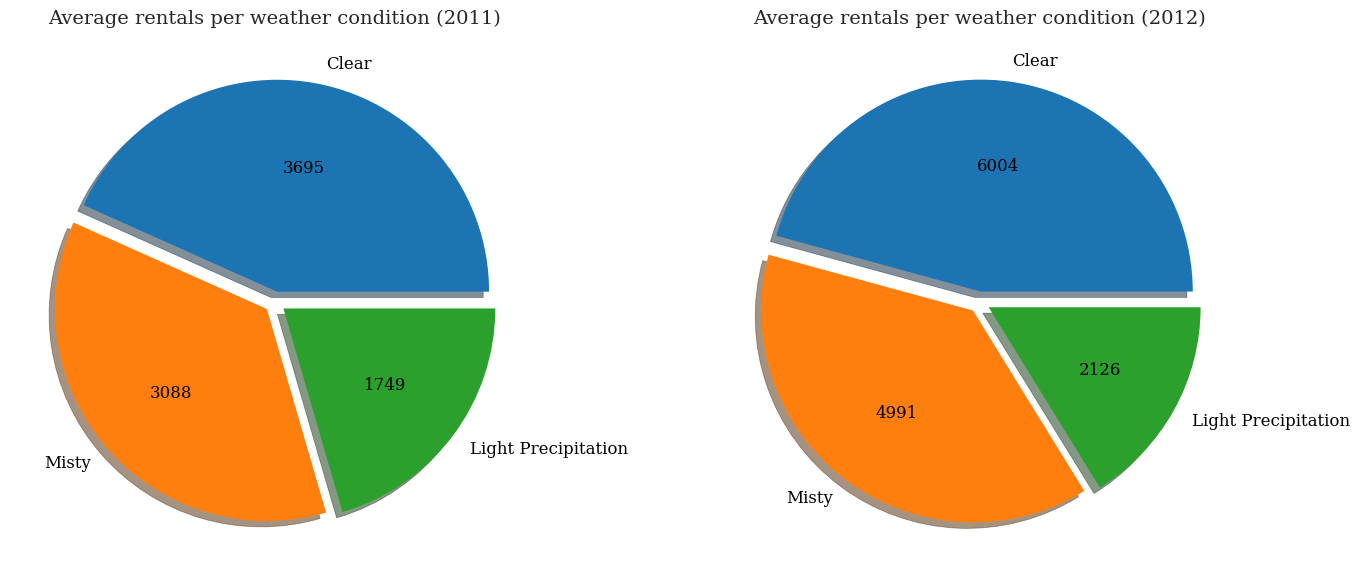

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

autopct_values_2011 = ['{:.0f}'.format(value) for value in weather2011]

ax1.pie(weather2011, labels = [weather_conditions[i] for i in weather2011.index],
        autopct = lambda p: autopct_values_2011.pop(0), explode = (0.05, 0.05, 0.05),
        colors = [color_map[i] for i in weather2011.index],
        textprops = {'color':'k', 'fontname':'Serif', 'fontsize':12, 'fontweight':'medium'}, shadow = True)
ax1.set_title("Average rentals per weather condition (2011)", fontproperties = 'serif', pad = 10)


autopct_values_2012 = ['{:.0f}'.format(value) for value in weather2012]

ax2.pie(weather2012, labels = [weather_conditions[i] for i in weather2012.index],
        autopct = lambda p: autopct_values_2012.pop(0), explode = (0.05, 0.05, 0.05),
        colors = [color_map[i] for i in weather2011.index],
        textprops = {'color':'k', 'fontname':'Serif', 'fontsize':12, 'fontweight':'medium'}, shadow = True)
ax2.set_title("Average rentals per weather condition (2012)", fontproperties = 'serif', pad = 10)

plt.tight_layout()
plt.show()

These two pie charts illustrate the average number of rentals for each weather condition, with the left chart representing data from 2011 and the right chart from 2012. Clear weather conditions dominate the top position in both years, followed by misty and light precipitation.

Across the board, there are increases in average rentals, with clear conditions experiencing the most significant surge at 61.5%. Even though the average rentals for light precipitation shown the smallest percentage change, there's still growth observed.

To capitalize on these trends, we could consider setting up rental locations in sunny areas with low precipitation levels. Additionally, offering complementary raincoats during rainy periods could help maintain customer levels even in adverse weather conditions. By leveraging favorable weather conditions and adapting to less favorable ones, we can maximize customer engagement and rental revenue.

This answers the question:'which weather condition results in the most customers?'

In [41]:
color_map = {1: '#1c74b3', 2: '#ff7f0e', 3: '#2ca02c'}
weather_conditions = {1:'Clear', 2:'Misty', 3: 'Light Precipitation'}

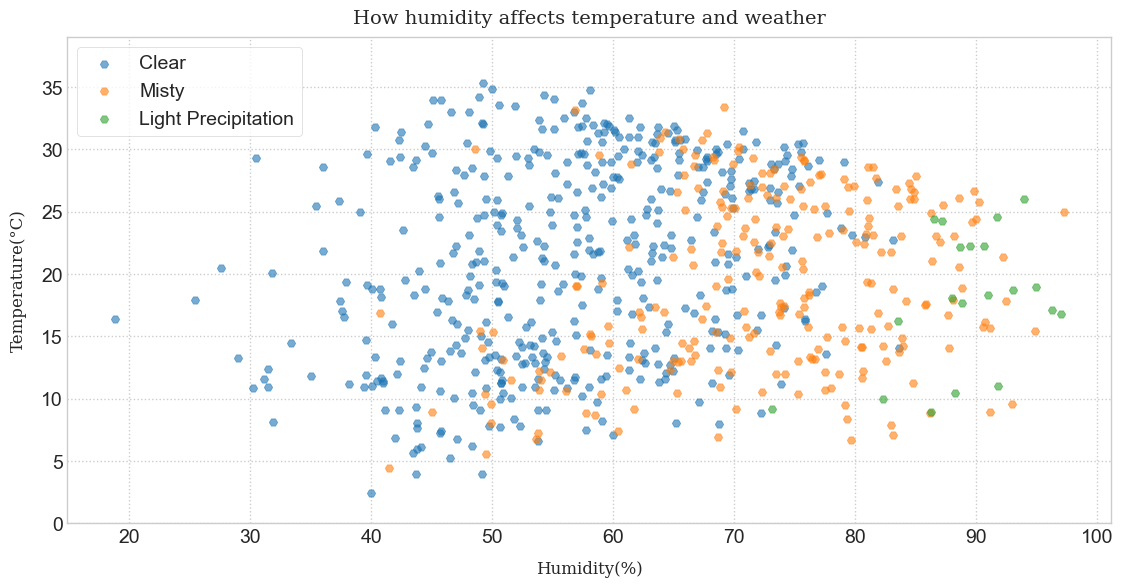

In [42]:
plt.figure(figsize = (12, 6))

for weather, color in color_map.items():
    season_data = df[df['weathersit'] == weather]
    plt.scatter(season_data['hum'], season_data['temp'], color = color, label = f'{weather_conditions[weather]}', marker = 'H', alpha = 0.6)
    
plt.xlabel('Humidity(%)', fontsize = 12, fontproperties='serif', labelpad = 10)
plt.ylabel('Temperature(°C)', fontsize = 12, fontproperties='serif', labelpad = 10)
plt.title('How humidity affects temperature and weather', pad = 10, fontsize = 15, fontproperties = 'serif')
plt.legend(loc = 'upper left', frameon = True)
plt.ylim(0, 39)
plt.grid(linestyle = ':')


plt.show()

This scatter plot illustrates the relationship between humidity and other factors like temperature and weather conditions. It's clear from the graph that a humidity range between 40% and 70% correlates with higher temperatures while maintaining predominantly good weather conditions.

Identifying this pattern allows our company to strategically target future expansion areas. By focusing on regions that typically fall within this optimal humidity range, we can ensure that potential customers are in favorable conditions for renting bikes. This targeted approach can lead to increased rentals and subsequently higher revenue.

This graph also once again supports the findings from the 3d surface plot; 60% humidity is a favourable setting in maximising rentals

This visual answers the question: 'Which weather conditions result in the most customers?'

In [43]:
frequency = df.groupby('weekday')['cnt'].mean()
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
frequency.sort_values(ascending = True, inplace = True)
label = [weekday_map[i] for i in frequency.index]

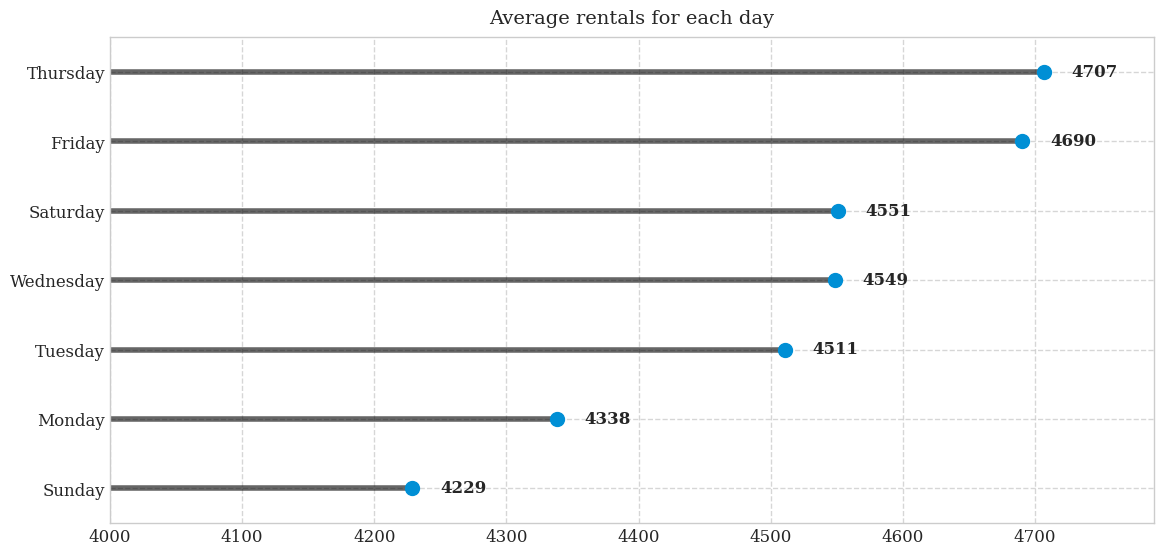

In [44]:
plt.figure(figsize = (12, 6))
y = np.arange(len(weekday_map))
plt.hlines(y = y, xmin = 0, xmax = frequency.values, color = 'k', alpha = 0.6)
plt.plot(frequency.values, y, "o", markersize = 10)

plt.xlim(4000, 4790)
plt.ylim(-0.5, 6.5)

plt.xticks(fontproperties = 'serif', fontsize = 12)
plt.yticks(y, label, fontproperties = 'serif', fontsize = 12)

for i, value in enumerate(frequency.values):
    plt.annotate(f'{value:.0f}',
                 xy = (value, y[i]),
                 xytext = (20, -3),
                 textcoords = 'offset points',
                 ha = 'left',
                 fontproperties = 'serif',
                 fontweight = 600,
                 fontsize = 12)


plt.title("Average rentals for each day", fontsize = 12, fontproperties = 'serif', pad = 10)
plt.grid(alpha = 0.8, linestyle = '--')
plt.show()

This lolipop chart highlights the days of the week with the highest average rentals, with Thursday and Friday standing out as the peak days, while Sunday records the lowest number of rentals.

To capitalize on this data, we can strategically plan events and adjust pricing accordingly. For instance, we could schedule events on busy days to attract more customers and consider implementing higher prices during peak periods. Conversely, we could offer discounts or special promotions on off-peak days, such as Sunday, to incentivize usage.

Given that Sunday is often regarded as a family day, we could introduce family-based discounts or packages to encourage families to spend time cycling together instead of pursuing other activities. Additionally, we can optimize our bike repair and maintenance schedules by scheduling them on less busy days. This ensures that we maintain the quality of our bikes while minimizing the risk of running out of bikes during peak periods.

This graph answers the question:'Which days of the week have the most demand?'

In [45]:
frequency = df.groupby('weekday')['cnt'].mean()
casual = df.groupby('weekday')['casual'].mean()
registered = df.groupby('weekday')['registered'].mean()
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
label = [weekday_map[i] for i in frequency.index]

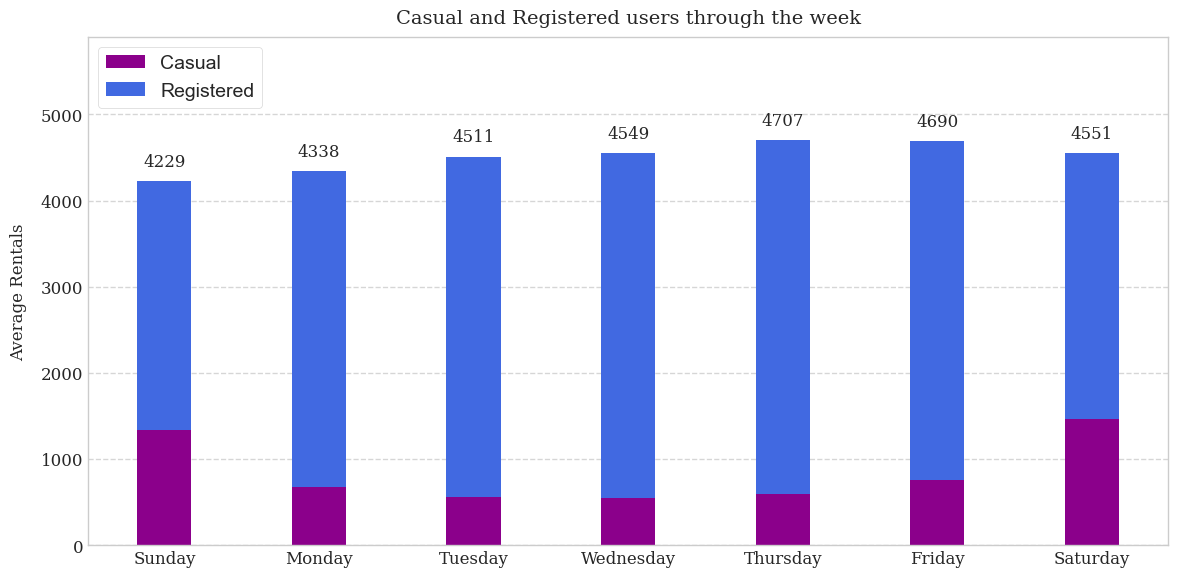

In [46]:
width = 0.35

fig, ax = plt.subplots(figsize = (12, 6))
casual_bar = ax.bar(label, casual, width, label = 'Casual', color = 'darkmagenta')
registered_bar = ax.bar(label, registered, width, bottom = casual,label = 'Registered', color = 'royalblue')

ax.set_title('Casual and Registered users through the week', fontsize = 18, fontproperties = 'serif', pad = 10)
ax.set_ylabel('Average Rentals', fontsize = 12, fontproperties = 'serif', labelpad = 10)
plt.xticks(fontproperties = 'serif', fontsize = 12)
plt.yticks(fontproperties = 'serif', fontsize = 12)
ax.set_ylim(0, 5900)

def autolabel(bottom, top):
    for each in zip(bottom, top):
        height = 0
        for i in each:
            height += i.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy = (each[0].get_x() + each[0].get_width() / 2, height),
                    xytext = (0, 8), 
                    fontproperties = 'serif',
                    fontsize = 12,
                    textcoords = "offset points",
                    ha ='center', va ='bottom')

autolabel(casual_bar, registered_bar)
        
        
plt.legend(loc = 'upper left', frameon = True)
fig.tight_layout()

plt.grid(alpha = 0.8, linestyle = '--', axis = 'y')
plt.grid(axis = 'x', alpha = 0)
plt.show()

This stacked bar chart illustrates the distribution of users throughout the week, distinguishing between registered and casual users. The number of casual users remains relatively low from Tuesday to Thursday, with a slight increase on Monday and Friday, and a significant surge during the weekends. It's noteworthy that despite Sunday having a high number of casual users, it is the day of the week with the lowest overall user count.

Given that the majority of our company's users are registered, there's a clear indication that our focus should be on cultivating long-term customer relationships by prioritizing quality and fostering brand loyalty. To achieve this, we should concentrate on enhancing the customer experience, addressing their needs, and actively seeking feedback to retain more customers. By demonstrating our sincerity and commitment to customer satisfaction, we can cultivate a stronger inclination among users to become long-term customers.

This visual answers the question:'Does the business have more casual or registered users?'

In [47]:
df['windspeed'].mean()

12.756095890410958

According to https://weatherspark.com/y/20957/Average-Weather-in-Washington-D.C.;-United-States-Year-Round, the average wind speed in Washington DC is 7.99mph, which is 12.8km/h. (WASHINGTON, D.C. Climate, Weather by Month, Average Temperature (Washington, D.C.; United States) - Weather Spark, n.d.)
Thus, I am assuming the windspeed is in km/h for this dataset.

In [48]:
temp = df['temp']
windspeed = df['windspeed']
cnt = df['cnt']

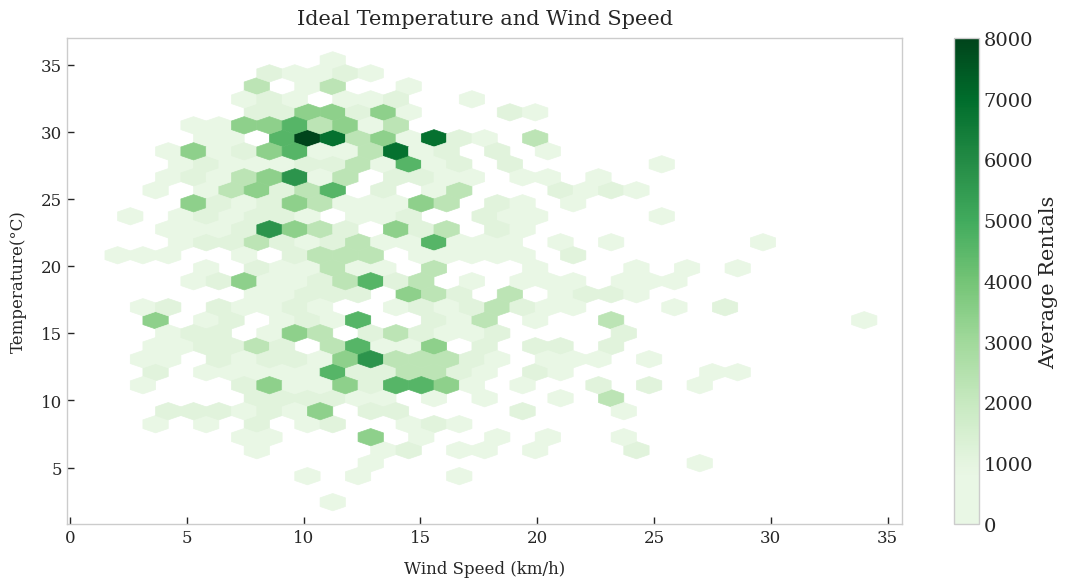

In [49]:
plt.figure(figsize = (12, 6))

darker_green = plt.cm.Greens
color = darker_green(np.arange(darker_green.N))
color[:25] = color[25, :]
custom_cmap = mcolors.ListedColormap(color)


hexbin = plt.hexbin(windspeed, temp, gridsize = 30, cmap = custom_cmap, mincnt = 1)
plt.title('Ideal Temperature and Wind Speed', pad = 10, fontproperties = 'serif', fontsize = 15)

plt.xlabel('Wind Speed (km/h)', labelpad = 10, fontproperties = 'serif', fontsize = 12)
plt.ylabel('Temperature(°C)', labelpad = 10, fontproperties = 'serif', fontsize = 12)
plt.xticks(fontproperties = 'serif', fontsize = 12)
plt.yticks(fontproperties = 'serif', fontsize = 12)

ax = plt.gca()
ax.xaxis.set_tick_params(width = 1, length = 5, direction = 'in', which = 'both')
ax.yaxis.set_tick_params(width = 1, length = 5, direction = 'in', which = 'both')

cb = plt.colorbar(hexbin, ax = ax)
cb.set_label('Average Rentals', fontproperties = "serif", fontsize = 15)
cb_ticks = np.linspace(hexbin.get_array().min(), hexbin.get_array().max(), 9)
cb_ticklabels = np.linspace(0, 8000, 9)
cb.set_ticks(cb_ticks)
cb.set_ticklabels([f'{label:.0f}' for label in cb_ticklabels], fontsize = 6, fontproperties = 'serif')
cb.set_label('Average Rentals', fontproperties = "serif", fontsize = 15)

plt.grid(c = 'w')

This is a hexbin plot of temperature on the y axis, windspeed on the x axis. The color intensity of each hexagon represents the number of average rentals for that weather conditon. The darker the gradient, the more the rentals there were. The sweetspot for bike rentals seems to be between 8-16km/h at 30°C. It is notable that theven at 12.5°C, there seems to be quite high number of rentals, which I suspect where due to the high amount of rentals in winter. The team can do several things to try and improve out revenue: We could shift our efforts towards areas with these conditions which are deemed suitable for bike riding, as well as having customer feedback to understand the allure of biking in winter. Aside from this, our team could use the walk a mile immersion technique where we go bike in those condtions to indentify what makes the biking experience worse on windy or days with very little wind.

This graph answers the question:'How does the wind affect rentals?' and 'How does temperature affect bike rentals?'

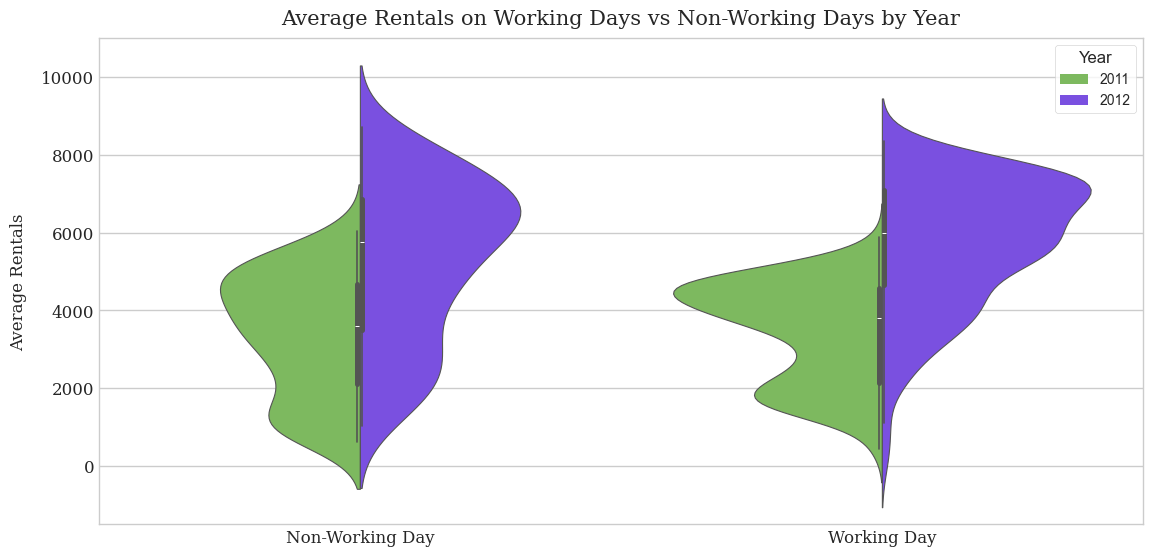

In [50]:
palette = {0: '#78C850', 1: '#7038F8'}

plt.figure(figsize = (12, 6))
sns.violinplot(data = df, x = 'workingday', y = 'cnt', hue = 'yr', split = True, palette = palette, linewidth = .8)
plt.title('Average Rentals on Working Days vs Non-Working Days by Year', fontproperties = 'serif', pad = 10, fontsize = 15)
plt.ylabel('Average Rentals', fontproperties = 'serif', labelpad = 10, fontsize = 12)
plt.xlabel('')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'], fontproperties = 'serif', fontsize = 12)
plt.yticks(fontproperties = 'serif', fontsize = 12)
plt.ylim(-1500, 11000)
plt.legend(handles, ["2011", "2012"], title = 'Year', loc = 'upper right', fontsize = 10, title_fontsize = '12', prop = {'size': 10}, frameon = True)
plt.show()


This grouped violin plot with split violins compares the average number of rentals on working days versus non-working days. It's evident that the median for working days is higher than for non-working days, with a smaller interquartile range, indicating more consistent values, possibly influenced by daily commutes.

The company can leverage this insight to tailor efforts towards offering a point system or incentives to attract more long-term commuters on working days, while organizing events on non-working days to appeal to casual users, fostering a more recreational use of bikes, perhaps in the form of family bike outings.

Additionally, the plot displays the distribution of users for both working and non-working days for 2011 and 2012 side by side. The rental distribution for non-working days remains identical for both years, with only a change in mean, while the distribution of rentals for working days is more consistent in 2012, indicating improved and more consistent customer retention and loyalty.

The appearance of the value being in the negatives is due to estimations during the computing process of a violin plot.(Violin Plots and Logarithmic Axes - FAQ 2183 - GraphPad, n.d.)

This answers the question:'Do people rent more bikes on working or non-working days?'

In [51]:
cnt = df['cnt']
working_day = df['workingday']

In [52]:
fil2011 = df[df['yr'] == 0]
cnt2011 = fil2011.groupby('season')['cnt'].mean()
fil2012 = df[df['yr'] == 1]
cnt2012 = fil2012.groupby('season')['cnt'].mean()
x = [1, 2, 3, 4]
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

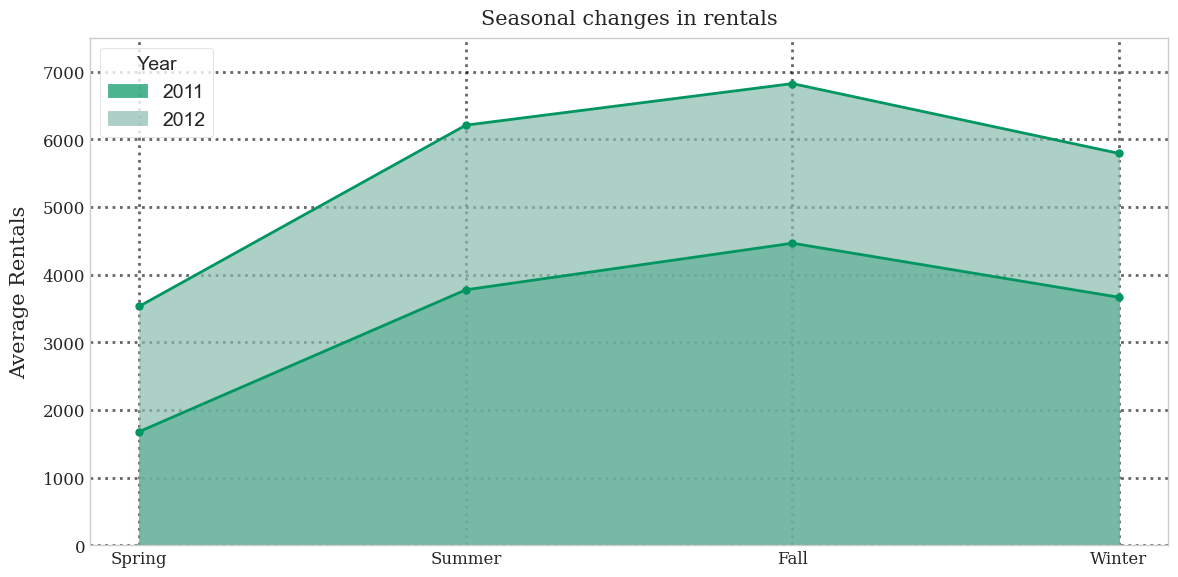

In [53]:
plt.figure(figsize=(12, 6))

plt.fill_between(x, cnt2011, color = "#009660", alpha = 0.7, label = '2011')
plt.fill_between(x, cnt2012, color = "#89BBAF", alpha = 0.7, label = '2012')
plt.plot(x, cnt2011, '-o', color = "#009660", linewidth = 2, markersize = 5)
plt.plot(x, cnt2012, '-o', color = "#009660", linewidth = 2, markersize = 5)

plt.title('Seasonal changes in rentals', fontproperties = 'serif', fontsize = 15, pad = 10)
plt.ylabel('Average Rentals', fontproperties = 'serif', fontsize = 15, labelpad = 10)
plt.xticks(ticks = [1, 2, 3, 4], labels = [season_names[i] for i in range(1, 5)])

plt.legend(loc = 'upper left', frameon = True, title = 'Year')
plt.xticks(fontproperties = 'serif', fontsize = 12)
plt.yticks(fontproperties = 'serif', fontsize = 12)
plt.ylim(0, 7500)

plt.grid(c = 'k', linestyle = ':', alpha = 0.6, linewidth = 2)
plt.tight_layout()
plt.show()

This figure consists of two charts displayed on the same plot, illustrating the average daily rentals for each season in 2011 and 2012. It's apparent from the graph that while 2012 experienced a rise in rentals across all seasons, the overall shape of the graph remains similar for both years, indicating a consistent seasonal pattern. The observed increase in rentals can thus be attributed not to changes in seasonal demand, but rather to a general uptick in interest, possibly driven by marketing initiatives.

This visual answers the question:'Which season had the most demand?' and provides more context to: 'How did the number of bike rentals change over the years?'

In [54]:
fil2011 = df[df['yr'] == 0]
fil2012 = df[df['yr'] == 1]
cnt = df['cnt']
hum = df['hum']
temp = df['temp']
windspeed = df['windspeed']
yr = df['yr']

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\66783567.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\66783567.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\66783567.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



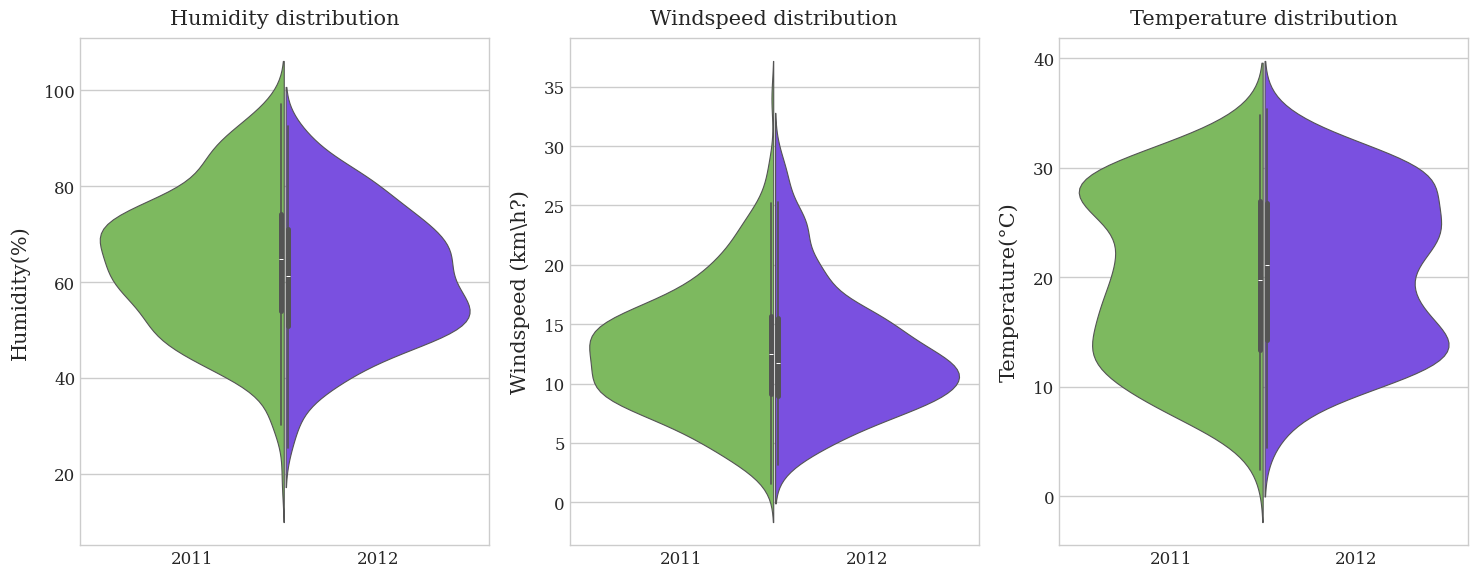

In [55]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
palette = {0: '#78C850', 1: '#7038F8'}
sns.violinplot(x = yr, y = hum, hue = yr, split = True, palette = palette, ax = ax[0], linewidth = .8, legend = False, width=0.99)

ax[0].set_title('Humidity distribution', fontproperties = 'serif', fontsize = 15, pad = 10)
ax[0].set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax[0].set_xlabel('')
ax[0].set_ylabel('Humidity(%)', fontproperties = 'serif', fontsize = 15, labelpad = 10)

serif_font = fp(family='serif', size=12)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(serif_font)
    
ax[0].set_xlim(-0.6, 1.6)

sns.violinplot(x = yr, y = windspeed, hue = yr, split = True, palette = palette, ax = ax[1], linewidth = .8, legend = False, width=0.99)
ax[1].set_title('Windspeed distribution', fontproperties = 'serif', fontsize = 15, pad = 10)
ax[1].set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax[1].set_xlabel('')
ax[1].set_ylabel('Windspeed (km\h?)', fontproperties = 'serif', fontsize = 15, labelpad = 10)

serif_font = fp(family = 'serif', size = 12)
for label in ax[1].get_yticklabels():
    label.set_fontproperties(serif_font)
    
ax[1].set_xlim(-0.6, 1.6)

sns.violinplot(x = yr, y = temp, split = True, hue = yr, palette = palette, ax = ax[2], linewidth = .8, legend = False, width=0.99)
ax[2].set_title('Temperature distribution', fontproperties = 'serif', fontsize = 15, pad = 10)
ax[2].set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax[2].set_xlabel('')
ax[2].set_ylabel('Temperature(°C)', fontproperties = 'serif', fontsize = 15, labelpad = 10)

serif_font = fp(family = 'serif', size = 12)
for label in ax[2].get_yticklabels():
    label.set_fontproperties(serif_font)
    
ax[2].set_xlim(-0.6, 1.6)


plt.tight_layout()

plt.show()


Three violin plots display the evolution of humidity, windspeed, and temperature distributions over the years. The temperature plot maintains an identical shape across both years, while the plots for humidity and windspeed exhibit slight alterations. Despite these changes, their median and interquartile ranges remain consistent. This suggests that external factors, like sudden shifts in temperature, windspeed, or humidity, did not occur between the two years. Instead, the observed changes likely stem from increased interest, possibly driven by marketing efforts.

This answers the question:'How did the number of bike rentals change over the years?'

Works in Jupyter notebook but inconsistent in VSCode

In [24]:
%matplotlib notebook

In [25]:
def animate(frame):
    plt.clf()
    casual = df[df["dteday"] == frame]["casual"].sum()
    registered = df[df["dteday"] == frame]["registered"].sum()
    total = [casual, registered]
    labels = ["Casual", "Registered"]
    
    plt.pie(total, labels = labels, autopct = lambda p: f'{p:.1f}%', 
            textprops = {'color': 'white', 'fontname': 'Serif', 'fontweight': 'bold'})
    plt.title(f"Date: {frame.strftime('%m/%d/%Y')}", fontproperties = "serif")
    plt.legend(loc = "upper right", bbox_to_anchor = (1.2, 1))

def run_animation():
    dates = df["dteday"].unique()
    fig = plt.figure(figsize = (9, 6))
    global ani
    ani = animation(fig, animate, frames = dates, repeat = False, cache_frame_data = False)
    plt.show()

run_animation()


<IPython.core.display.Javascript object>

This is an animation of a pie chart that shows how the ratio of casual and registered users have changed over the years. As time progresses, the pie chart will update itself to reflect the changes over time, providing a birds eye view on the propotion of our users that are registered. The percentage of casual users starts small and fluctuates a ton. However, there is a noticable increase in the minimum percentage for each month the further into the year before seemingly reseting again next year. The animation shows that a large majority of our users are registered, even during busy periods. This means that we shold focus more of our efforts into building a loyal customer base as that is where the majority of our revenue will come from. By observing periods of significant change, we can also identify when casual users spike, allowing us to promote deals to incentivise them to register and become a long term customer.

This visual answers the question: 'How does the ratio of registered and casual users change over the years?'

In [26]:
%matplotlib inline

## Dashboards

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\3454486983.py:25: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\3454486983.py:76: FutureWarning:



The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.


C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\3454486983.py:121: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\3454486983.py:123: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\txcjs\AppData\Local\Temp\ipykernel_31172\3454486983.py:128: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

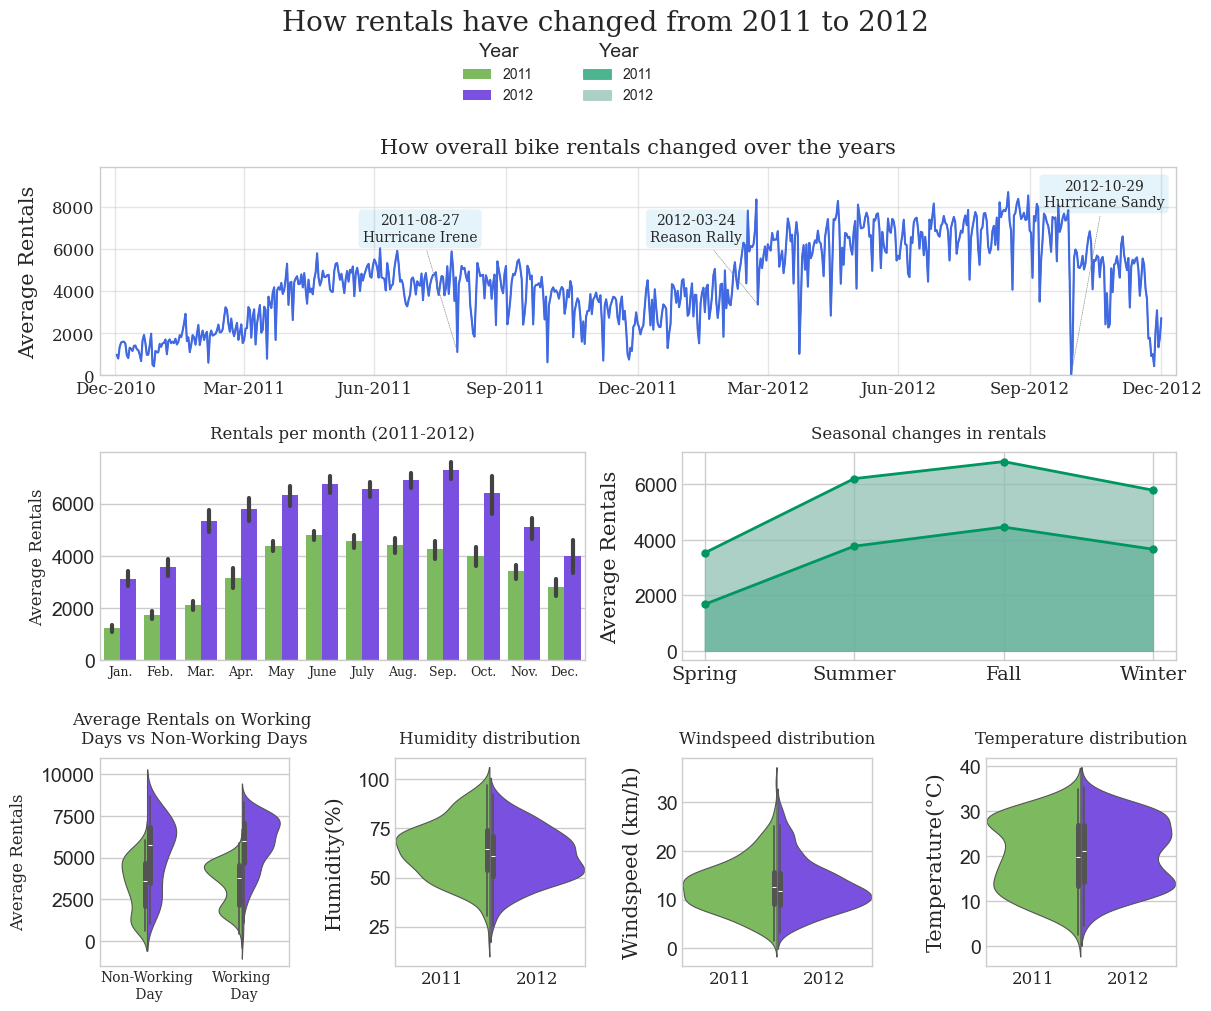

In [59]:
fig = plt.figure(figsize = (12, 10), constrained_layout = True)
gs = GridSpec(nrows = 3, ncols = 4, figure = fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[1, 2:])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[2, 2])
ax7 = fig.add_subplot(gs[2, 3])

# Graph 1
dteday = df["dteday"]
cnt = df["cnt"]

hurricane_sandy_date = pd.to_datetime("2012-10-29")
hurricane_irene_date = pd.to_datetime("2011-08-27")
reason_rally_date = pd.to_datetime("2012-03-24")

ax1.plot(dteday, cnt, color = "royalblue", label = "Bike rentals", linewidth = 1)
ax1.set_title("How overall bike rentals changed over the years", fontproperties = "serif", fontsize = 15, pad = 10)
ax1.set_ylabel("Average Rentals", labelpad = 10, fontsize = 15, fontproperties = "serif")

ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 1, interval = 3))
tick_labels = pd.date_range(start = pd.to_datetime("2010-12-20"), end = pd.to_datetime("2013-01-10"), freq = '3M')
ax1.set_xticks(tick_labels)
ax1.set_xticklabels([label.strftime('%b-%Y') for label in tick_labels])


for label in ax1.get_xticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')

for label in ax1.get_yticklabels():
    label.set_fontsize(12)
    label.set_fontname('serif')
    
# Annotation    
y_value_sandy = df[df['dteday'] == hurricane_sandy_date]['cnt'].values
ax1.annotate(f'{"2012-10-29"}\nHurricane Sandy', xy = (hurricane_sandy_date, y_value_sandy), xytext = (pd.to_datetime("2012-11-21"), 0.99 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color = 'grey'),
           fontproperties = "serif", fontsize = 10)


y_value_irene = df[df['dteday'] == hurricane_irene_date]['cnt'].values
ax1.annotate(f'{"2011-08-27"}\nHurricane Irene', xy = (hurricane_irene_date, y_value_irene), xytext = (pd.to_datetime("2011-08-01"), 0.8 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color = 'grey'),
           fontproperties = "serif", fontsize = 10)


y_value_rally = df[df['dteday'] == reason_rally_date]['cnt'].values
ax1.annotate(f'{"2012-03-24"}\nReason Rally', xy = (reason_rally_date, y_value_rally), xytext = (pd.to_datetime("2012-02-10"), 0.8 * df['cnt'].max()),
            textcoords = 'data', ha = 'center', va = 'center',
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "-", linestyle = ':', color='grey'),
           fontproperties = "serif", fontsize = 10)
    
    

ax1.set_xlim(pd.to_datetime("2010-12-20"), pd.to_datetime("2013-01-10"))
ax1.set_ylim(0, 9900)
ax1.grid(alpha = 0.5)


ax1.plot(dteday, cnt, color = "royalblue", label = "Bike rentals", linewidth = 1.5)
ax1.set_title("How overall bike rentals changed over the years", fontproperties = "serif", fontsize = 15, pad = 10)
ax1.set_ylabel("Average Rentals", labelpad = 10, fontsize = 15, fontproperties = "serif")

# Graph 2
x_labels = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
palette = {0: '#78C850', 1: '#7038F8'}
sns.barplot(x = 'mnth', y = 'cnt', data = df, hue = 'yr', palette = palette, ax = ax2, errwidth = 3)
ax2.set_xticks(range(len(x_labels)))
ax2.set_xticklabels(x_labels, fontproperties = "serif", fontsize = 9, fontweight = 200)
ax2.set_title("\nRentals per month (2011-2012)", fontproperties = "serif", fontsize = 12, pad = 10)
ax2.set_xlabel("", fontproperties = "serif", fontsize = 12)
ax2.set_ylabel("Average Rentals", fontproperties = "serif", fontsize = 12)
ax2.get_legend().set_visible(False)

# Graph 3
palette = {0: '#78C850', 1: '#7038F8'}
sns.violinplot(data = df, x = 'workingday', y = 'cnt', hue = 'yr', split = True, palette = palette, ax = ax3, linewidth = .8)

ax3.set_title('\nAverage Rentals on Working \nDays vs Non-Working Days', fontproperties = 'serif', pad = 10, fontsize = 12)
ax3.set_ylabel('Average Rentals', fontproperties = 'serif', labelpad = 10, fontsize = 12)
ax3.set_xlabel('')
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Non-Working\n Day', 'Working\n Day'], fontproperties = 'serif', fontsize = 10)
ax3.set_ylim(-1500, 11000)
ax3.get_legend().set_visible(False)


# Graph 4
fil2011 = df[df['yr'] == 0]
cnt2011 = fil2011.groupby('season')['cnt'].mean()
fil2012 = df[df['yr'] == 1]
cnt2012 = fil2012.groupby('season')['cnt'].mean()
x = [1, 2, 3, 4]
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
ax4.fill_between(x, cnt2011, color = '#009660', alpha = 0.7, label = '2011')
ax4.fill_between(x, cnt2012, color = '#89BBAF', alpha = 0.7, label = '2012')
ax4.plot(x, cnt2011, '-o', color = '#009660', linewidth = 2, markersize = 5)
ax4.plot(x, cnt2012, '-o', color = '#009660', linewidth = 2, markersize = 5)
ax4.set_title('\nSeasonal changes in rentals', fontproperties='serif', fontsize = 12, pad = 10)
ax4.set_ylabel('Average Rentals', fontproperties = 'serif', fontsize = 15, labelpad = 10)
ax4.set_xticks(ticks = [1, 2, 3, 4])
ax4.set_xticklabels([season_names[i] for i in range(1, 5)], fontproperties = 'serif')

# Graph 5
cnt = df['cnt']
hum = df['hum']
temp = df['temp']
windspeed = df['windspeed']
yr = df['yr']

palette = {'0': '#78C850', '1': '#7038F8'}
sns.violinplot(x = yr, y = hum, split = True, palette = palette, ax = ax5, linewidth = .8,  width = 0.99)
ax5.set_title('\nHumidity distribution', fontproperties = 'serif', fontsize = 12, pad = 10)
ax5.set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax5.set_xlabel('')
ax5.set_ylabel('Humidity(%)', fontproperties = 'serif', fontsize = 15, labelpad = 10)

# Graph 6
sns.violinplot(x = yr, y = windspeed, split = True, palette = palette, ax = ax6,linewidth = .8,  width = 0.99)
ax6.set_title('\nWindspeed distribution', fontproperties = 'serif', fontsize = 12, pad = 10)
ax6.set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax6.set_xlabel('')
ax6.set_ylabel('Windspeed (km/h)', fontproperties = 'serif', fontsize = 15, labelpad = 10)

# Graph 7
sns.violinplot(x = yr, y = temp, split = True, palette = palette, ax = ax7, linewidth = .8,  width = 0.99)
ax7.set_title('\nTemperature distribution', fontproperties = 'serif', fontsize = 12, pad = 10)
ax7.set_xticklabels(['2011', '2012'], fontproperties = 'serif', fontsize = 12)
ax7.set_xlabel('')
ax7.set_ylabel('Temperature(°C)', fontproperties = 'serif', fontsize = 15, labelpad = 10)


legend_labels_ax2 = ['2011', '2012']
legend_labels_ax4 = ['2011', '2012']
handles_ax2, _ = ax2.get_legend_handles_labels()
handles_ax4, _ = ax4.get_legend_handles_labels()
fig.legend(handles_ax2, legend_labels_ax2, loc = 'upper right', title = 'Year',bbox_to_anchor = (0.45, 0.975), fontsize = 10)
fig.legend(handles_ax4, legend_labels_ax4, loc = 'upper right', title = 'Year', bbox_to_anchor = (0.55, 0.975), fontsize = 10)
fig.suptitle("How rentals have changed from 2011 to 2012\n\n\n", fontsize = 20, fontproperties = 'serif')

plt.show()

This dashboard shows a consistent increase in rentals from 2011 to 2012. Each year exhibits a distinct seasonal pattern with peaks and valleys in rental numbers throughout the year. However, anomalies such as hurricanes and rallies can cause significant dips in rentals. The distribution charts depict relatively similar weather conditions across both years, with consistent shapes and median values for humidity, wind speed, and temperature. Similarly, seasonal sales show consistent trends.

Changes in peak rental months and a more stable volume of rentals on working days suggest that marketing initiatives and strategic shifts have been effective in driving company growth. It's advisable to maintain our current marketing efforts, as they have proven effective, while also focusing on commuters who rent our bikes for daily work commutes. Not only are rentals from commuters more consistent, but they also yield a higher median rental volume.

Business questions answered:                                                                                                    
'How did the number of bike rentals change over the years?'                                                    
'Which season had the most demand?'                                                                                       
'Do people rent more bikes on working or non-working days?'                                                                   
'Which months had the demand?'                                                                            

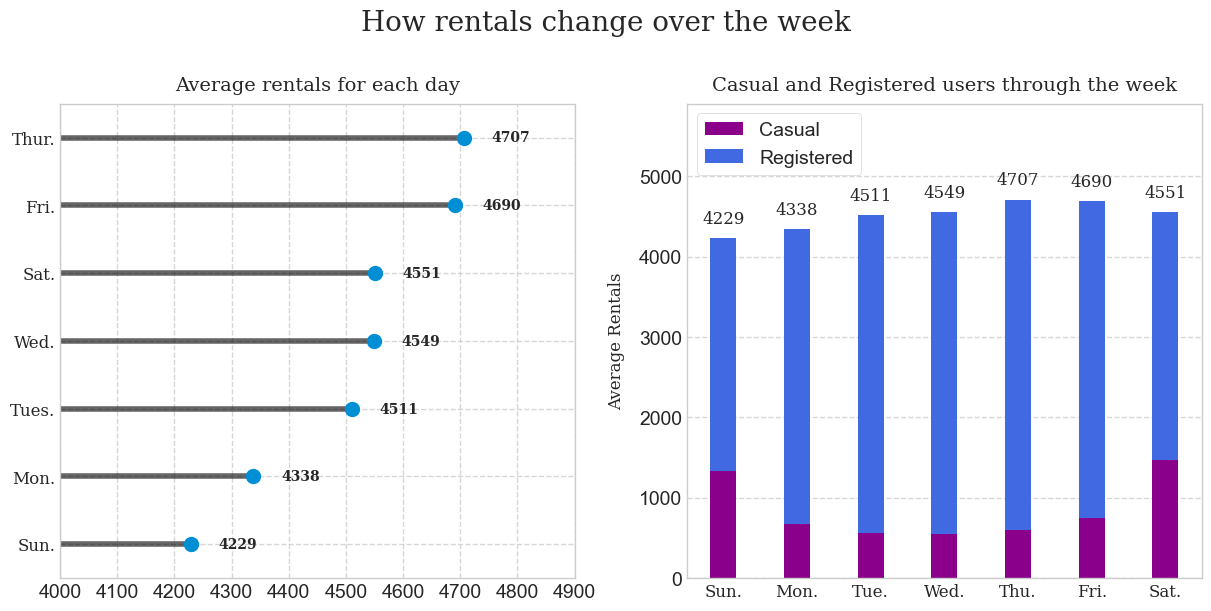

In [60]:
frequency = df.groupby('weekday')['cnt'].mean()
weekday_map = {0:'Sun.', 1:'Mon.', 2:'Tues.', 3:'Wed.', 4:'Thur.', 5:'Fri.', 6:'Sat.'}
frequency.sort_values(ascending = True, inplace = True)
label = [weekday_map[i] for i in frequency.index]

fig = plt.figure(figsize = (12, 6), constrained_layout = True)
gs = GridSpec(1, 2, figure = fig)

# Graph 1
ax1 = fig.add_subplot(gs[0, 0])
y = np.arange(len(weekday_map))
ax1.hlines(y = y, xmin = 0, xmax = frequency.values, color = 'k', alpha = 0.6)
ax1.plot(frequency.values, y, "o", markersize = 10)
ax1.set_xlim(4000, 4790)
ax1.set_ylim(-0.5, 6.5)
ax1.set_xticks(np.arange(4000, 4975, 100))
ax1.set_yticks(y)
ax1.set_yticklabels(label, fontproperties = 'serif', fontsize = 12)
ax1.set_title("Average rentals for each day", fontsize = 12, fontproperties = 'serif', pad = 10)
ax1.grid(alpha = 0.8, linestyle = '--')
for i, value in enumerate(frequency.values):
    ax1.annotate(f'{value:.0f}',
                 xy = (value, y[i]),
                 xytext = (20, -3),
                 textcoords = 'offset points',
                 ha = 'left',
                 fontproperties = 'serif',
                 fontweight = 600,
                 fontsize = 10)


# Graph 2
frequency = df.groupby('weekday')['cnt'].mean()
casual = df.groupby('weekday')['casual'].mean()
registered = df.groupby('weekday')['registered'].mean()
weekday_map = {0:'Sun.', 1:'Mon.', 2:'Tue.', 3:'Wed.', 4:'Thu.', 5:'Fri.', 6:'Sat.'}
label = [weekday_map[i] for i in frequency.index]

width = 0.35

ax2 = fig.add_subplot(gs[0, 1])
casual_bar = ax2.bar(label, casual, width, label = 'Casual', color = 'darkmagenta')
registered_bar = ax2.bar(label, registered, width, bottom = casual, label = 'Registered', color = 'royalblue')
ax2.set_title('Casual and Registered users through the week', fontsize = 15, fontproperties = 'serif', pad = 10)
ax2.set_ylabel('Average Rentals', fontsize = 12, fontproperties = 'serif', labelpad = 10)
ax2.set_ylim(0, 5900)
ax2.set_xticks(np.arange(len(label)))
ax2.set_xticklabels(label, fontproperties = 'serif', fontsize = 12)

def autolabel(bottom, top):
    for each in zip(bottom, top):
        height = 0
        for i in each:
            height += i.get_height()
        ax2.annotate('{:.0f}'.format(height),
                    xy = (each[0].get_x() + each[0].get_width() / 2, height),
                    xytext = (0, 8), 
                    fontproperties = 'serif',
                    fontsize = 12,
                    textcoords = "offset points",
                    ha ='center', va ='bottom')

autolabel(casual_bar, registered_bar)
ax2.legend(loc = 'upper left', frameon = True)
ax2.grid(alpha = 0.8, linestyle = '--', axis = 'y')
ax2.grid(axis = 'x', alpha = 0)
fig.suptitle("How rentals change over the week\n", fontsize = 20, fontproperties = 'serif')

plt.show()

The dashboard offers a clearer insight into the distribution of rentals throughout the week. Notably, Thursday and Friday exhibit higher rental rates compared to other days, while Sunday and Monday show lower rental activity. The stacked bar chart provides additional data to discern the composition of rentals, distinguishing between casual and registered customers. Despite the surge in casual users over the weekends, the majority of our company's rentals stem from registered customers. Leveraging this understanding, we should prioritize catering to our registered customer base by offering incentives such as a points or rewards system to encourage more individuals to register and become long-term customers. Emphasizing quality and conducting regular surveys can aid in refining our product to meet the preferences of our customers, fostering continued usage. Additionally, utilizing data on peak days of the week allows for strategic planning, such as offering family deals on Sundays, scheduling maintenance during quieter periods, and potentially adjusting prices during peak times.

Business questions answered:   
'Does the business have more casual or registered users?'    
'Which days of the week have the most demand?'

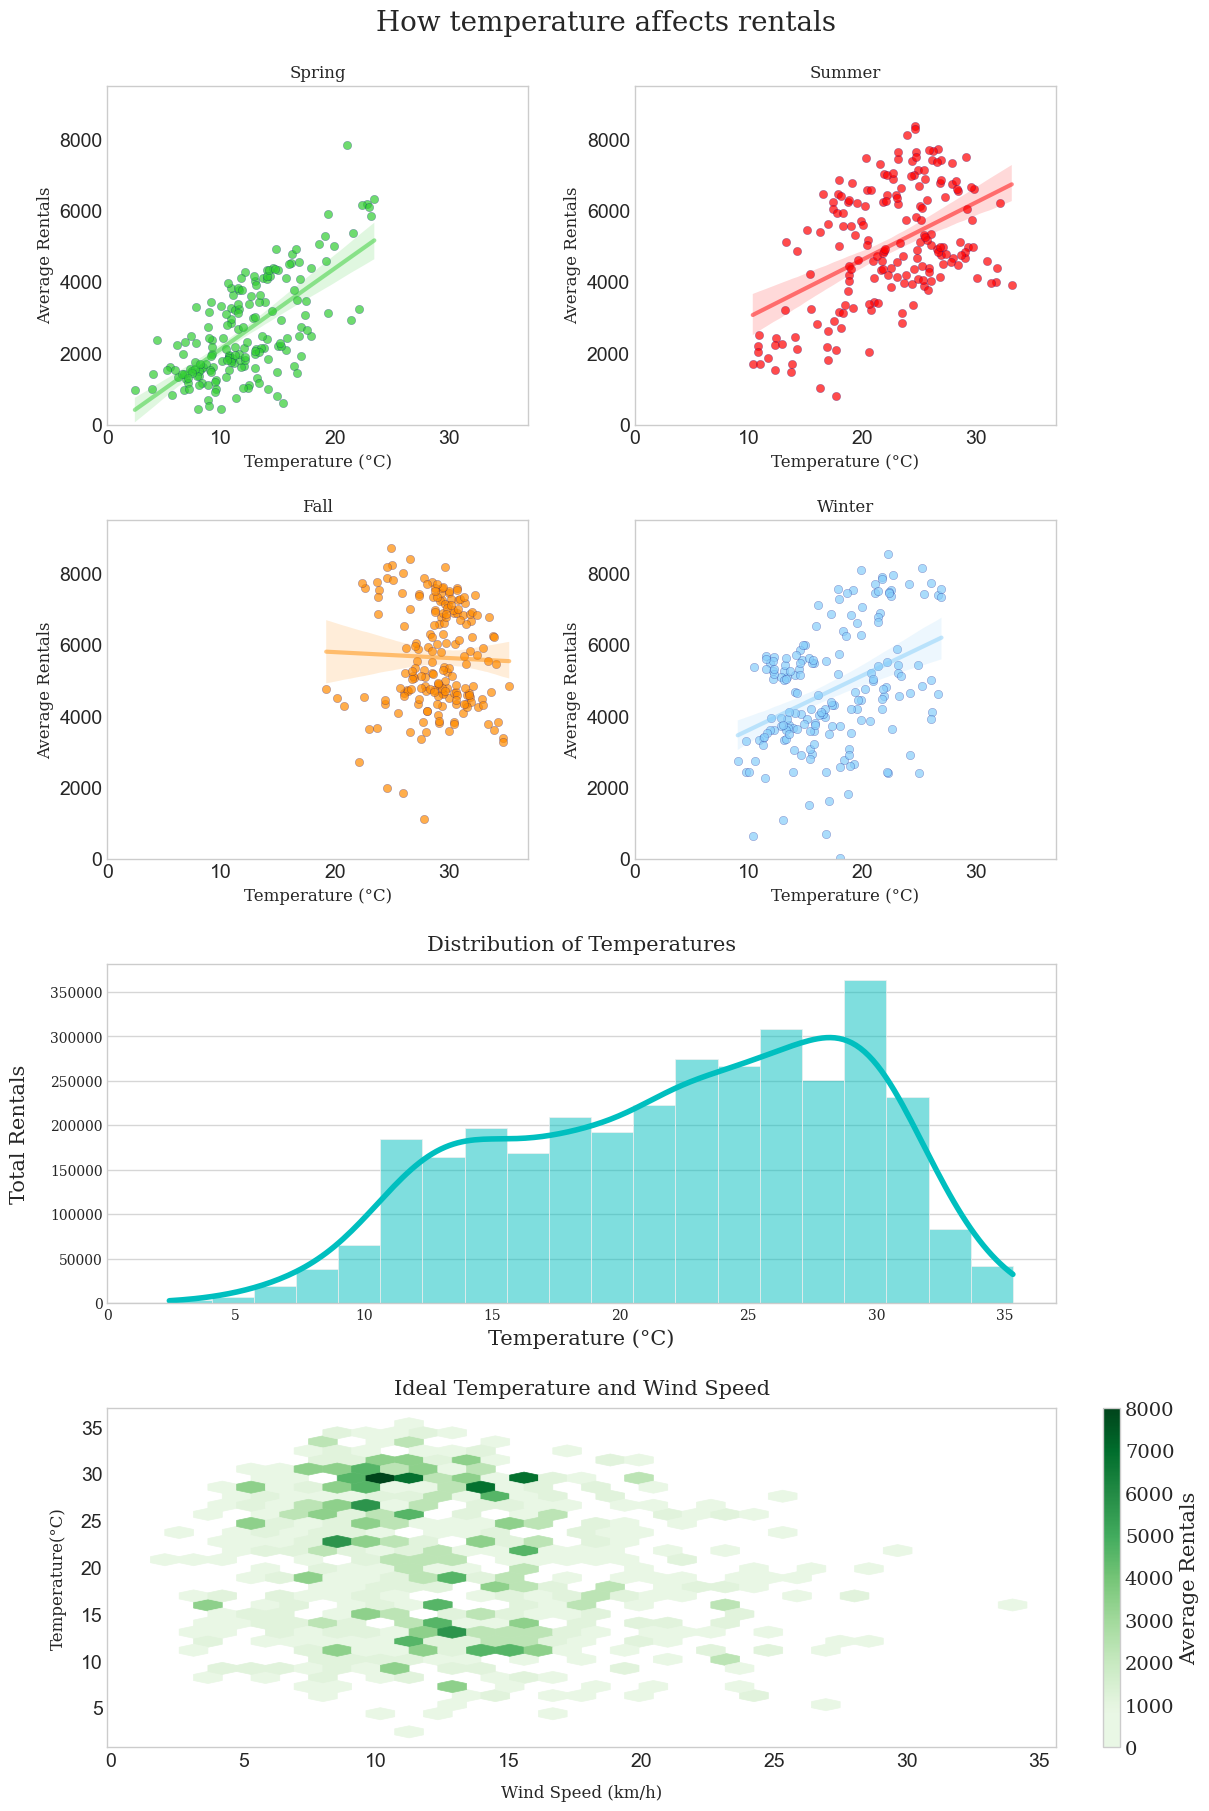

In [61]:
fig = plt.figure(figsize = (12, 18), constrained_layout = True)
gs = GridSpec(4, 2, figure = fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])

# Graph 1
temp = df["temp"]
cnt = df["cnt"]
season = df["season"]
seasons = df.groupby("season")["cnt"].count()
color_map = {1: 'limegreen', 2: 'red', 3: 'darkorange', 4: 'lightskyblue'}
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}


for i, season_key in enumerate(color_map.keys(), 1):
    season_df = df[df['season'] == season_key]
    ax = None
    
    if i == 1:
        ax = ax1
    elif i == 2:
        ax = ax2
    elif i == 3:
        ax = ax3
    elif i == 4:
        ax = ax4
    
    sns.scatterplot(x = season_df['temp'], y = season_df['cnt'], color = color_map[season_key],
                    alpha = 0.7, edgecolor = '#000080', linewidth = 0.2, ax = ax)
    sns.regplot(x = season_df['temp'], y = season_df['cnt'], scatter = False, color = color_map[season_key],
                ax = ax, line_kws = {'alpha': 0.5, 'lw': 3})
    ax.set_title(f"\n{season_labels[season_key]}", fontproperties = "serif", fontsize = 12)
    ax.set_xlim(0, 37)
    ax.set_ylim(0, 9500)
    ax.set_xlabel("Temperature (°C)", fontproperties = "serif", fontsize = 12)
    ax.set_ylabel("Average Rentals", fontproperties = "serif", fontsize = 12)
    ax.grid(c = "w")
        

# Graph 2
sns.histplot(data = df, x = 'temp', weights = 'cnt', kde = True, color = "c", bins = 20, ax = ax5)
ax5.set_title('\nDistribution of Temperatures', fontproperties = "serif", fontsize = 15, pad = 10)
ax5.set_xlabel('Temperature (°C)\n', fontproperties = "serif", fontsize = 15, labelpad = 5)
ax5.set_ylabel('Total Rentals', fontproperties = "serif", fontsize = 15, labelpad = 15)
ax5.set_xlim(0, 37)

for label in ax5.get_xticklabels():
    label.set_fontsize(10)
    label.set_fontname('serif')

for label in ax5.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontname('serif')
    
ax5.grid(alpha = 0.8)
ax5.xaxis.grid(False)


# Graph 3
temp = df['temp']
windspeed = df['windspeed']
cnt = df['cnt']

darker_green = plt.cm.Greens
color = darker_green(np.arange(darker_green.N))
color[:25] = color[25, :]
custom_cmap = plt.cm.colors.ListedColormap(color)

hexbin = ax6.hexbin(df['windspeed'], df['temp'], gridsize = 30, cmap = custom_cmap, mincnt = 1)
ax6.set_title('Ideal Temperature and Wind Speed', pad = 10, fontproperties = 'serif', fontsize = 15)
ax6.set_xlabel('Wind Speed (km/h)', labelpad = 10, fontproperties = 'serif', fontsize = 12)
ax6.set_ylabel('Temperature(°C)', labelpad = 10, fontproperties = 'serif', fontsize = 12)
cb = fig.colorbar(hexbin, ax = ax6)
cb.set_label('Total Rentals', fontproperties = "serif", fontsize = 15)
cb_ticks = np.linspace(hexbin.get_array().min(), hexbin.get_array().max(), 9)
cb_ticklabels = np.linspace(0, 8000, 9)
cb.set_ticks(cb_ticks)
cb.set_ticklabels([f'{label:.0f}' for label in cb_ticklabels], fontsize = 6, fontproperties = 'serif')
cb.set_label('Average Rentals', fontproperties = "serif", fontsize = 15)
ax6.grid(c = 'w')


fig.suptitle("How temperature affects rentals", fontproperties = "serif", fontsize = 20)
plt.show()

This dashboard explores the relationship between temperature and the number of rentals. The scatterplots indicate that temperature generally has a positive impact on rentals, except during Fall, where there's a slight negative correlation. Thus, focusing on areas with warmer temperatures seems wise, as rentals peaked there. However, it's important not to choose locations that are excessively hot. The optimal temperature range for high rentals appears to be between 25°C to 30°C, coupled with a wind speed of 8 to 16 km/h. Further analysis is recommended to understand the significant number of rentals during winter, despite suboptimal temperatures. This analysis could help identify opportunities for bike improvements or tailored promotions during the winter season.

Business questions answered:  
'How does the wind affect rentals?'          
'How does temperature affect bike rentals?'   
'Which season had the most demand?'   
'How does temperature affect bike rentals?'

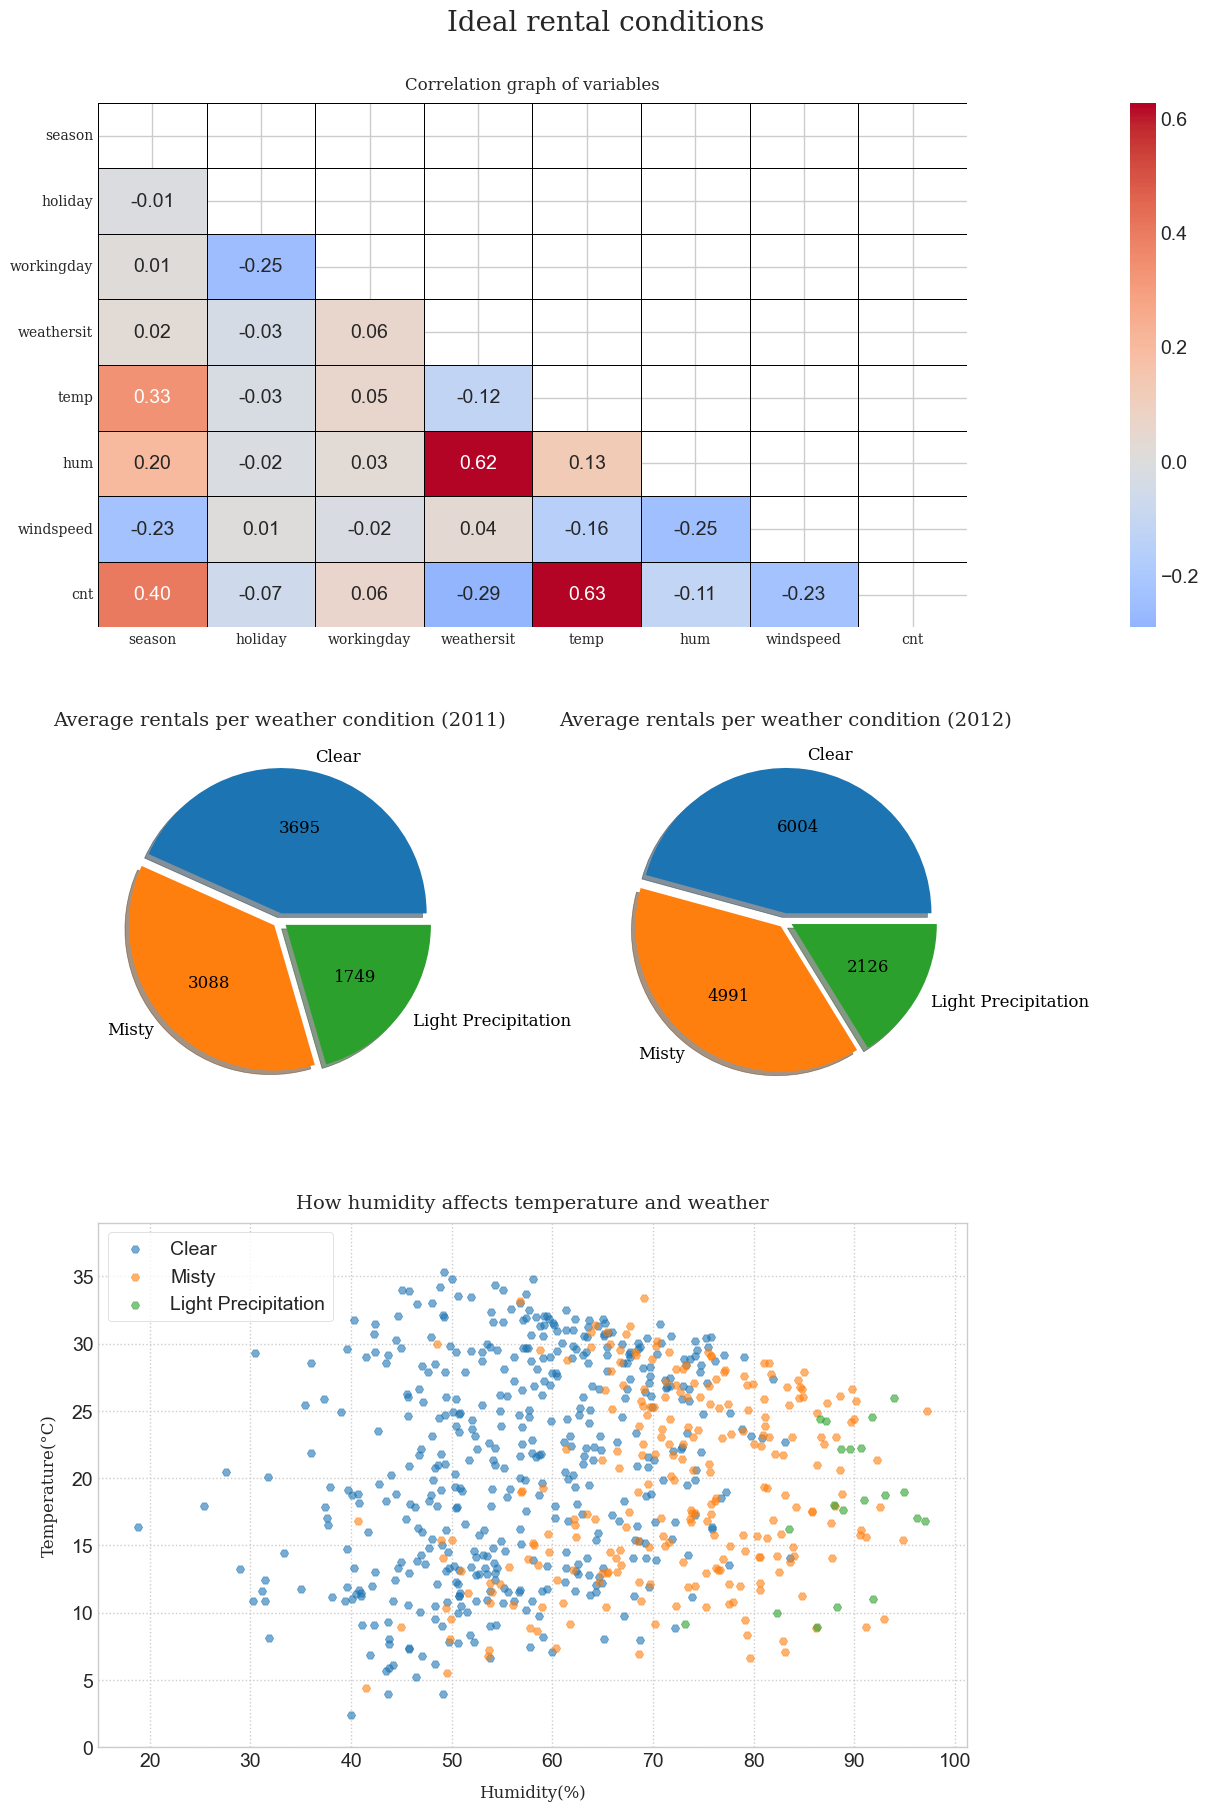

In [62]:
fig = plt.figure(figsize = (12, 18), constrained_layout = True)
gs = GridSpec(3, 2, figure = fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, :])

# Graph 1
df_corr = df[['season', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]
corr = df_corr.corr()
plt.style.use('fivethirtyeight')
mask = np.triu(np.ones_like(df_corr.corr(), dtype = bool))

sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'k', fmt = '.2f', mask = mask, ax = ax1)
ax1.set_title("Correlation graph of variables", fontproperties = "serif", fontsize = 12, pad = 10)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 10, fontname = 'serif')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 10, fontname = 'serif')

# Graph 2
plt.style.use('seaborn-v0_8-whitegrid')
yr2011 = df[df["yr"] == 0]
weather2011 = yr2011.groupby("weathersit")["cnt"].mean()
yr2012 = df[df["yr"] == 1]
weather2012 = yr2012.groupby("weathersit")["cnt"].mean()
weather_conditions = {1:'Clear', 2:'Misty', 3: 'Light Precipitation'}
color_map = {1: '#1c74b3', 2: '#ff7f0e', 3: '#2ca02c'}
autopct_values_2011 = ['{:.0f}'.format(value) for value in weather2011]

ax2.pie(weather2011, labels = [weather_conditions[i] for i in weather2011.index],
        autopct = lambda p: autopct_values_2011.pop(0), explode = (0.05, 0.05, 0.05),
        colors = [color_map[i] for i in weather2011.index],
        textprops = {'color':'k', 'fontname':'Serif', 'fontsize':12, 'fontweight':'medium'}, shadow = True)
ax2.set_title("Average rentals per weather condition (2011)", fontproperties = 'serif', pad = 10)


autopct_values_2012 = ['{:.0f}'.format(value) for value in weather2012]

ax3.pie(weather2012, labels = [weather_conditions[i] for i in weather2012.index],
        autopct = lambda p: autopct_values_2012.pop(0), explode = (0.05, 0.05, 0.05),
        colors = [color_map[i] for i in weather2011.index],
        textprops = {'color':'k', 'fontname':'Serif', 'fontsize':12, 'fontweight':'medium'}, shadow = True)
ax3.set_title("Average rentals per weather condition (2012)", fontproperties = 'serif', pad = 10)

# Graph 3
color_map = {1: '#1c74b3', 2: '#ff7f0e', 3: '#2ca02c'}
weather_conditions = {1:'Clear', 2:'Misty', 3: 'Light Precipitation'}


for weather, color in color_map.items():
    season_data = df[df['weathersit'] == weather]
    ax4.scatter(season_data['hum'], season_data['temp'], color = color, label = f'{weather_conditions[weather]}', marker = 'H', alpha = 0.6)
    
ax4.set_xlabel('Humidity(%)', fontsize = 12, fontproperties = 'serif', labelpad = 10)
ax4.set_ylabel('Temperature(°C)', fontsize = 12, fontproperties = 'serif', labelpad = 10)
ax4.set_title('How humidity affects temperature and weather', pad = 10, fontsize = 15, fontproperties = 'serif')
ax4.legend(loc = 'upper left', frameon = True)
ax4.set_ylim(0, 39)
ax4.grid(linestyle = ':')

fig.suptitle("Ideal rental conditions\n", fontproperties = "serif", fontsize = 20)
plt.show()

This dashboard aims to uncover the optimal conditions that lead to peak rentals. By identifying these conditions, we can strategize for future expansions into areas that offer such conditions, thereby maximizing profits. Our analysis indicates that to enhance rentals, we should target regions with warm temperatures and minimal wind. Clear and misty weather conditions, as depicted in the pie charts, significantly outperform periods of precipitation in terms of rental activity. However, finding locations with both favorable temperature and gentle weather can be challenging. Fortunately, our correlation graph reveals that humidity correlates with these factors. Yet, venturing into areas with excessively high humidity might expose us to harsh weather conditions despite warmer temperatures. Utilizing the scatterplot, we pinpointed an optimal range of humidity--between 40% and 70%. This range strikes a balance, offering a blend of warm temperatures and gentle weather conducive to driving sales.

Business questions answered:    
'Which weather condition results in the most customers?'

## Recommendations

After performing univariate and multivariate analysis, my team and I have come up with solutions to work on our core findings:  

#### 1) Adding a rewards system
Introducing a rewards system can significantly enhance customer engagement and loyalty. By offering points for every dollar spent, customers will feel incentivized to enroll in our monthly membership subscription. This subscription wnot only provides access to discounted rates but also accumulates points, which can be redeemed for various benefits such as free biking hours, shopping vouchers, or other products. This integrated rewards system will amplify the value proposition of our services, encouraging greater utilization of our bikes. Having a person use the same biking service continuously could also influence their friends and family towards using our services.

#### 2) Expansion or moving to suitable locations
After gathering data from our rental bikes, my team and I have discovered that the ideal condtions for bike rentals is:
- 20°C to 30°C
- 40% to 70% Humidity
- 8km/h to 16km/h winds
- Clear weather

Keeping all of this in mind, we could plan for future expansion into areas with these condtions. Trail locations should be tested beacuse even if a place seems perfect, if there is not enough people in that location, the revenue generation will still be lower than a busy location with suboptimal locations. Having enough bikes at busy areas such as near train stations for commuters while not being too close to high rise buildings to avoid the downdraugt effect at the point of rental is all important things to take note of. (Wind Speed Patterns in a City With Buildings, n.d.-b). Aside from just going for the most ideal conditions, we can also make best use of what is available to us; Raincoats can be provided during rainy days and special tyres for slippery conditions could persuade more people to rent bikes in harsher weather conditions. We could also schedule maintainence or store our bikes to prevent damage during rainy days.


#### 3) Seasonal events
Fall is the most popular season to rent bikes while spring has the lowest amount of rentals. Investigating why using the walk-a-mile immersion technique where we go on site to try riding bikes in different weather conditons could be the key to better understanding the perspectives of our customers, and why certain weather condtions attract or push them away. We could also ask the customers themselves, with routine surveys and rating systems to get a different perspective on our business. By leveraging this understanding, we can introduce seasonal events and discounts tailored to customer preferences. Offering winter gear for outdoor activities or bundling beach gear during summer can capitalize on seasonal trends, attracting more customers and enhancing overall profitability.

#### 4) Corporate Wellness Programs
Partnering with companies for their employee wellness programs not only promotes healthy lifestyle choices but also exposes our bike rental services to a wider audience. Employees participating in these programs may become regular customers, using our services for leisure or commuting. Additionally, establishing long-term business partnerships with companies can involve arrangements where they purchase store credit from us, providing a steady revenue stream and ensuring ongoing engagement with their employees. The increase in exposure from seeing so many of our bikes near a location will make more people want to use our service due to social proof.

#### 5) Marketing as a sustainable option
Focusing on marketing has worked wonders for our company, leading to large increase in rentals over the 2 years. However, I believe that being seen as a sustainable option will be what causes our company to truly skyrocket. If we quantify and communicate the environmental impact of biking compared to other transportation modes. We should utilize statistics and infographics to illustrate the positive effects of biking on air quality, greenhouse gas emissions, and urban sustainability.
Lastly, we should incoporate sustainability messaging and eco-friendly branding into our marketing and website so that we are associated as a sustainable company, appealing to eco-conscious customers.

## Citations

Violin Plots and Logarithmic Axes - FAQ 2183 - GraphPad. (n.d.). https://www.graphpad.com/support/faq/violin-plots-and-logarithmic-axes/#:~:text=Even%20though%20the%20data%20used,be%20negative%20(or%20zero).

WASHINGTON, D.C. Climate, Weather by month, Average temperature (Washington, D.C.; United States) - Weather Spark. (n.d.). Weather Spark. https://weatherspark.com/y/20957/Average-Weather-in-Washington-D.C.;-United-States-Year-Round

Wind speed patterns in a city with buildings. (n.d.-b). https://www.windcrane.com/blog/construction/wind-speed-patterns-city-buildings#:~:text=The%20effects%20of%20buildings%20on,tall%20buildings%20on%20each%20side.